# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context



### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# loading data
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/used.csv'
data = pd.read_csv(path) ## Complete the code to read the data
data.head()

Mounted at /content/drive


brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

### Checking the shape of the dataset

In [ ]:
data.shape ## Complete the code to get the shape of data

(3454, 15)

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data.select_dtypes(include=np.number).columns.to_list()

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

### Statistical summary of the dataset

In [ ]:
data.describe().T ## Complete the code to print the statistical summary of the data

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

### Checking for duplicate values

In [ ]:
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

### Checking for missing values

In [ ]:
data.isnull().sum() ## Complete the code to check missing entries in the data

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

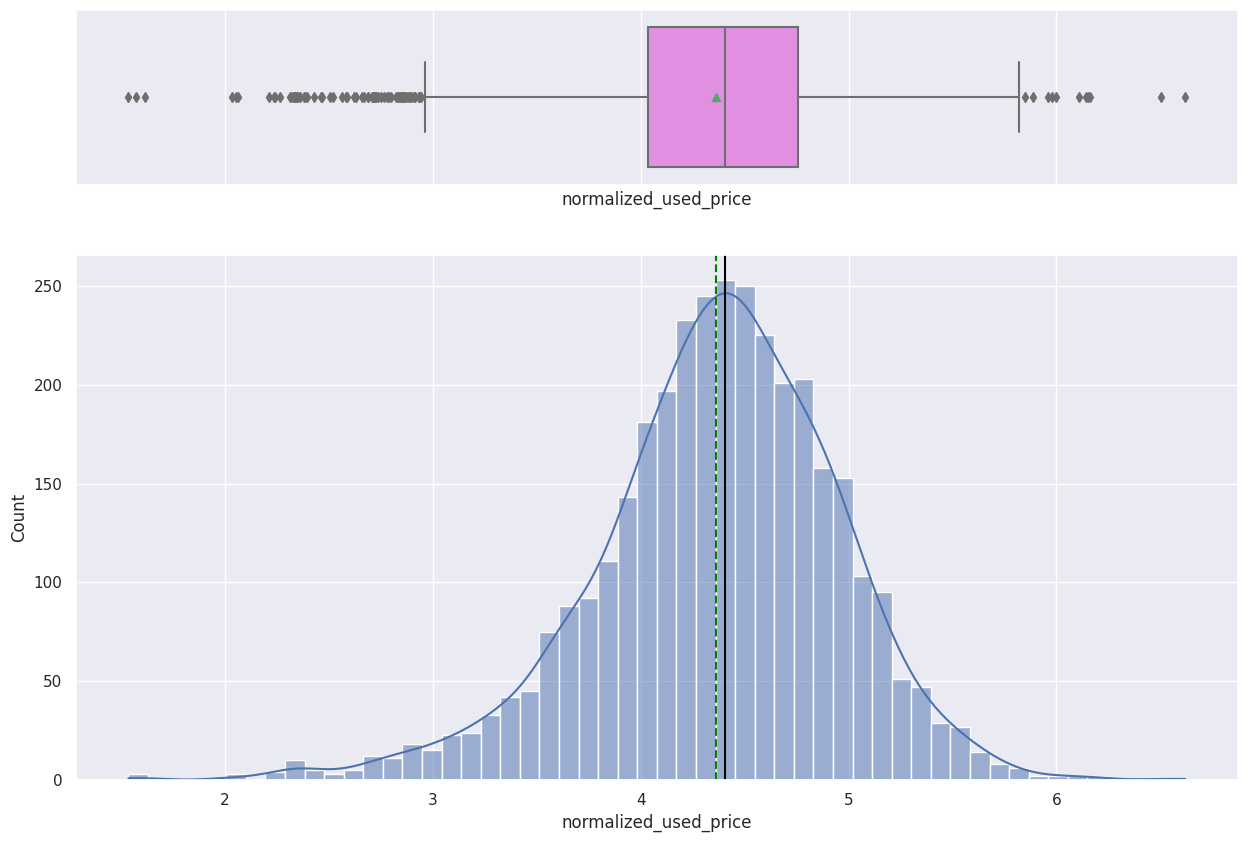

In [ ]:
histogram_boxplot(df, "normalized_used_price",kde=True)

**`normalized_new_price`**

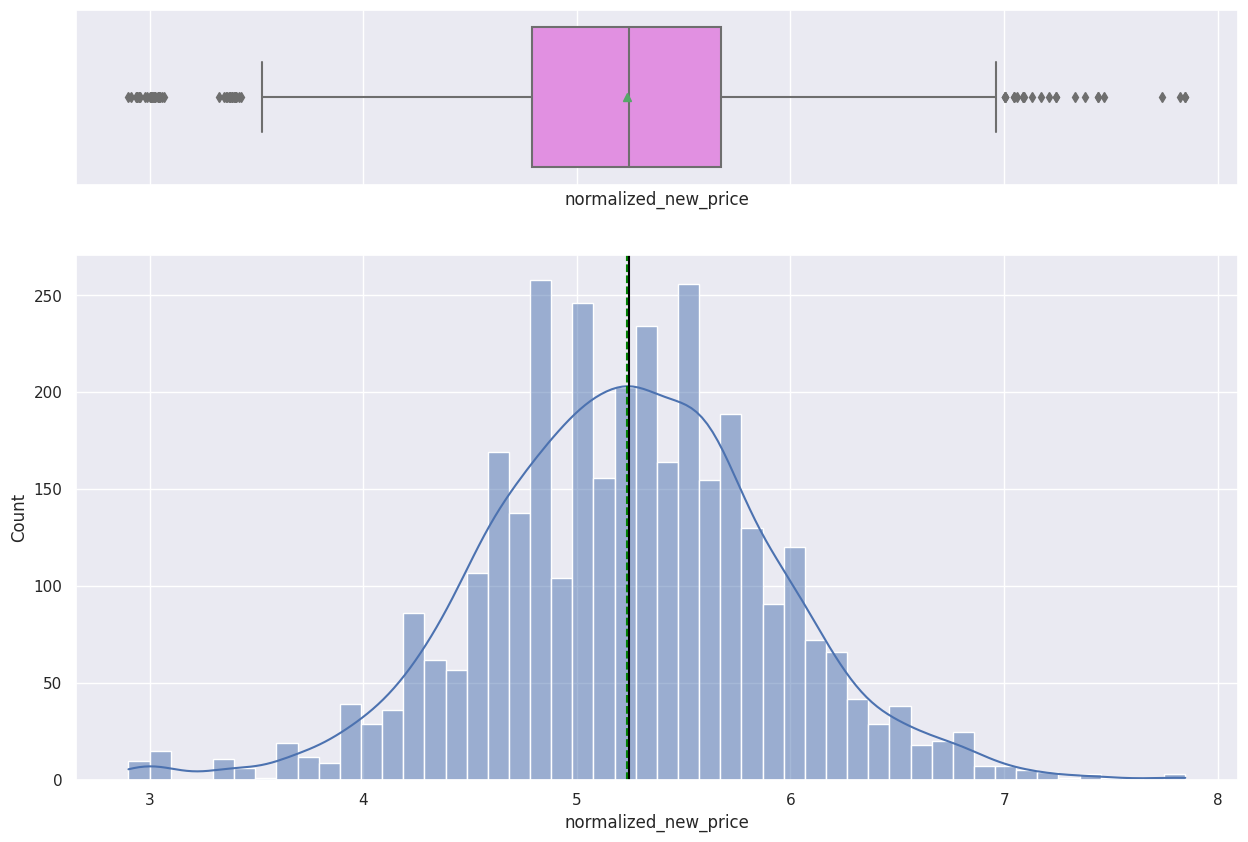

In [ ]:
histogram_boxplot(df,'normalized_new_price',kde=True,bins=50)  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

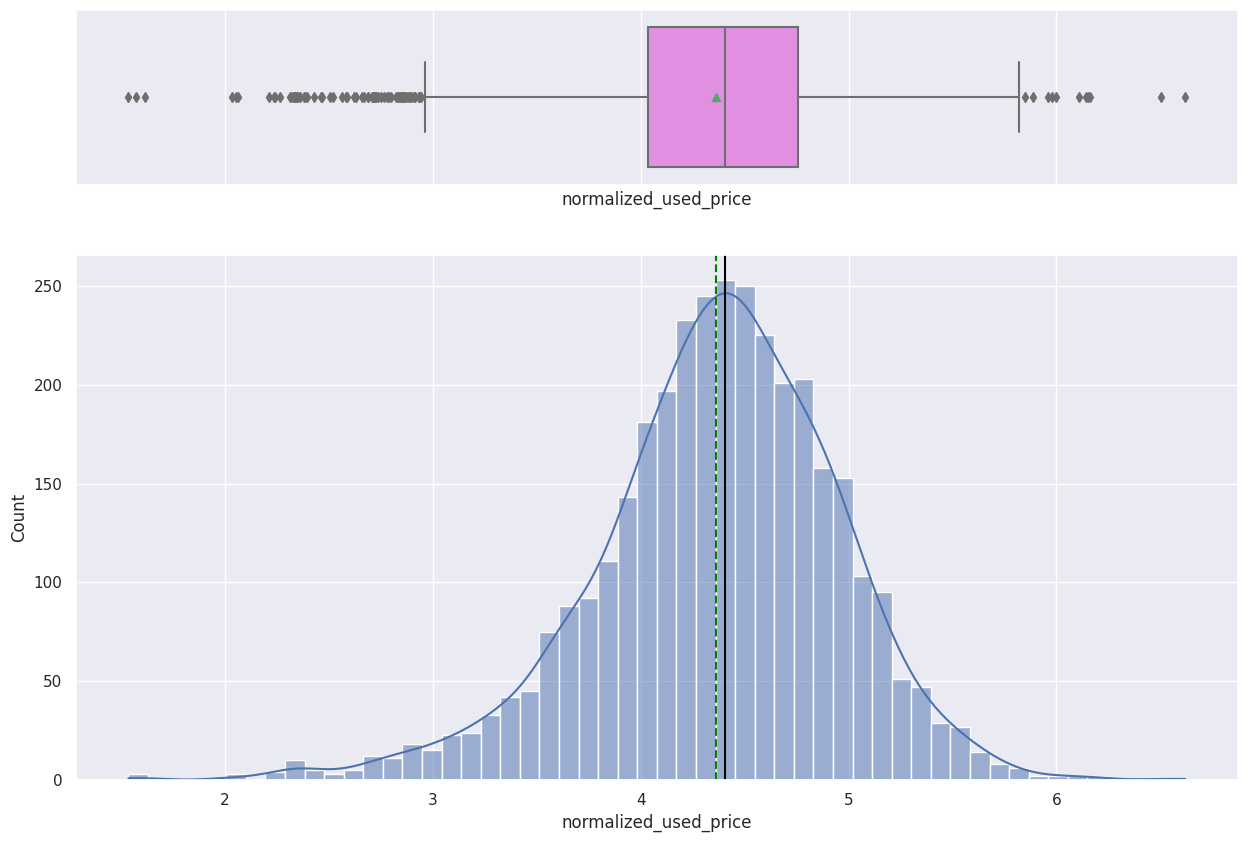

In [ ]:
histogram_boxplot(df,'normalized_used_price',kde=True)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

From the normalized_new_price histogram we infer that average and median new price is close to 5.2 units.
The normalized_new_price follows a approximate normal distribution.
From bar plot we infer that we have lot of outliers.


**`screen_size`**

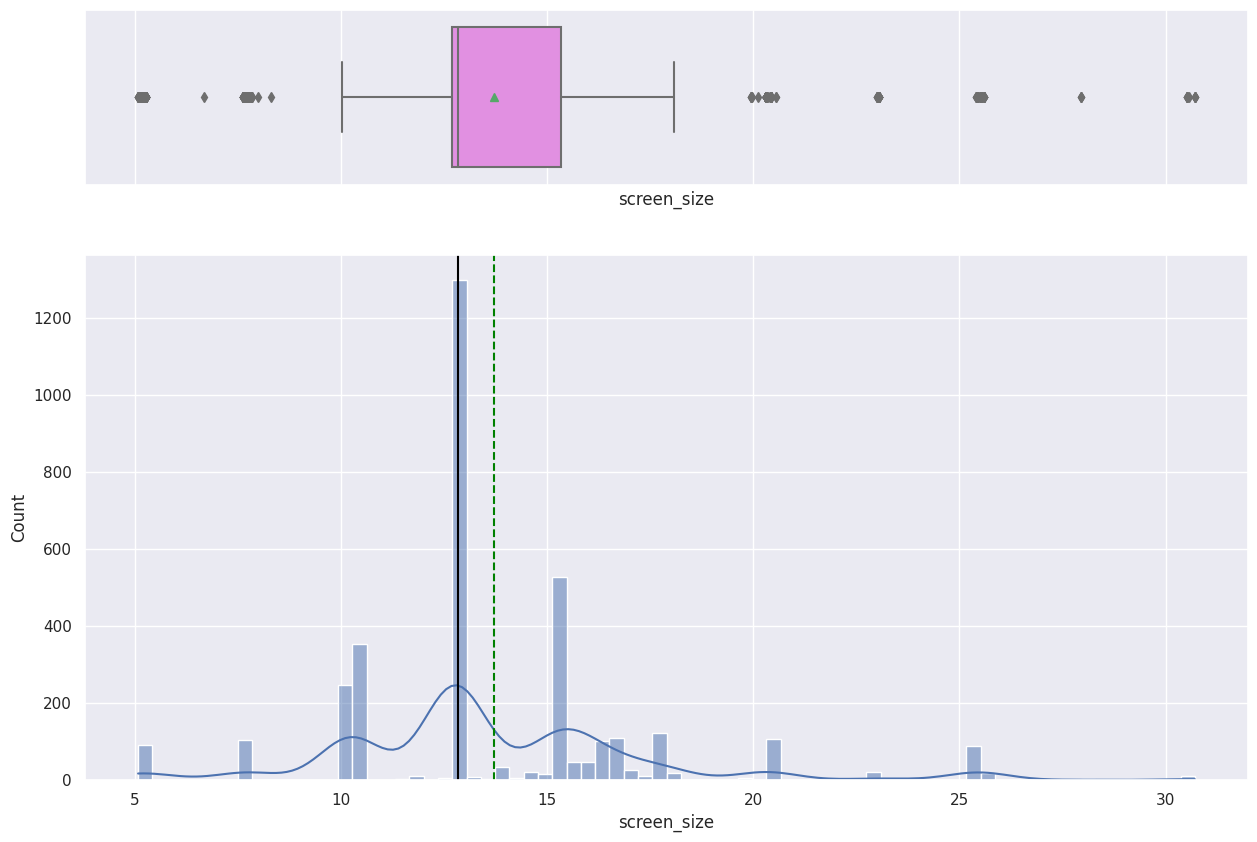

In [ ]:
histogram_boxplot(data=df,feature='screen_size',kde=True)  ## Complete the code to create histogram_boxplot for 'screen_size'

We infer that we have 3 peaks for screen size at 10 ,12 and 15 cm.
The data is skewed to right.



**`main_camera_mp`**

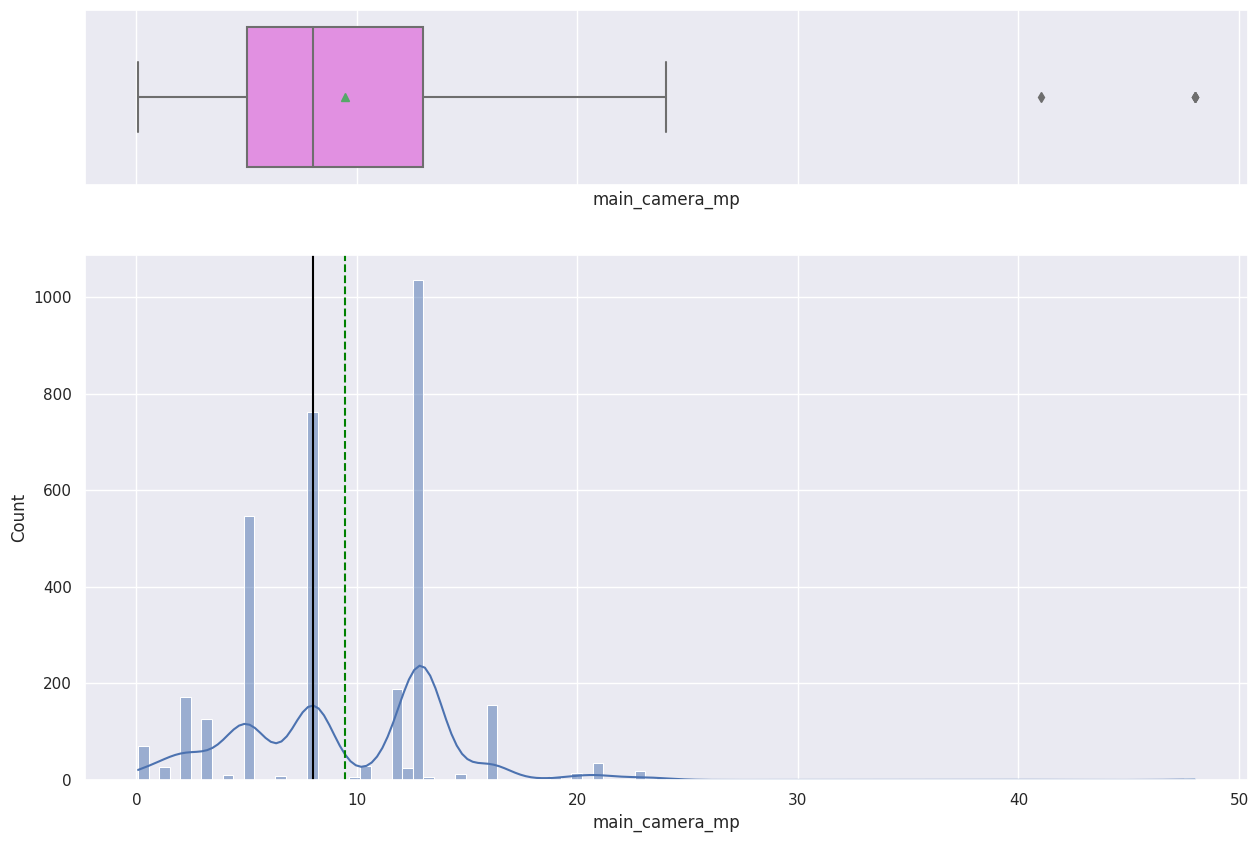

In [ ]:
histogram_boxplot(data=df,feature='main_camera_mp',kde=True,bins=100)  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

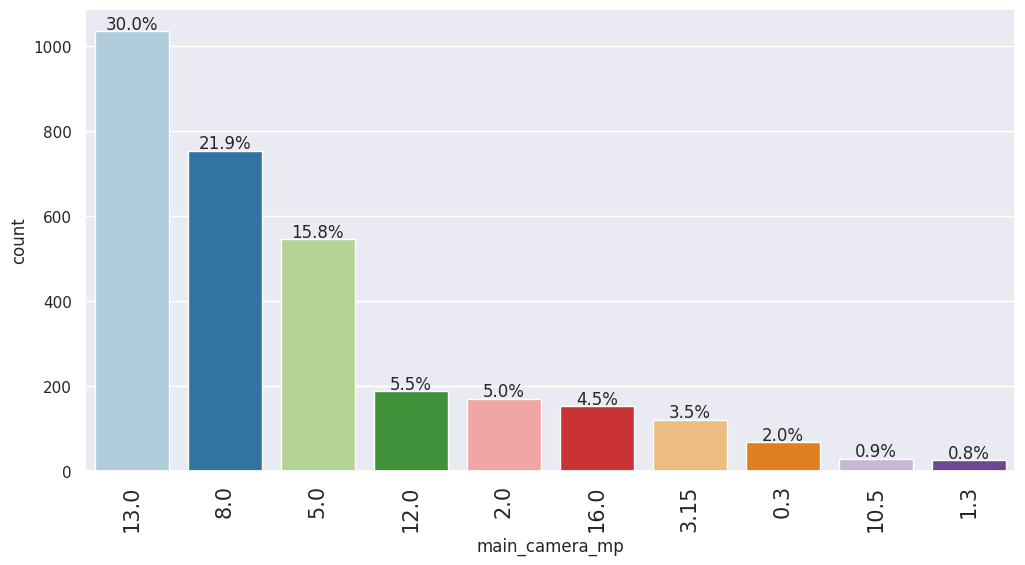

In [ ]:
labeled_barplot(data=df,feature='main_camera_mp',perc=True,n=10)

In [ ]:
df['main_camera_mp'].value_counts().index[:5]

Float64Index([13.0, 8.0, 5.0, 12.0, 2.0], dtype='float64')




*   Main camera megapixel lies in the range of 0 to 24 approximately.
*   There are 3 peaks at 5 mp,8 mp and 13 mp.
*   From bar plot we infer that 30 percent of cameras have 13 mp,
    close to 22 percent of cameras have 8 mp.



**`selfie_camera_mp`**

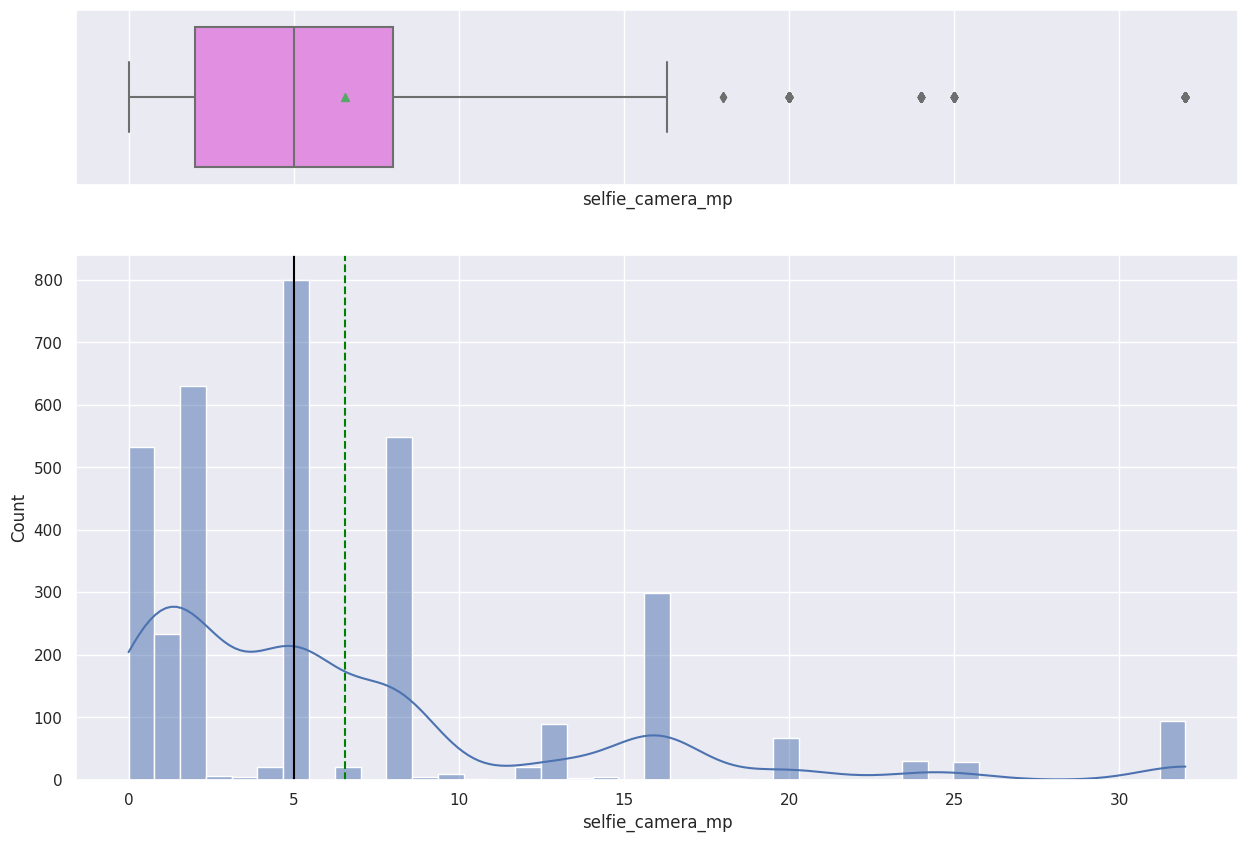

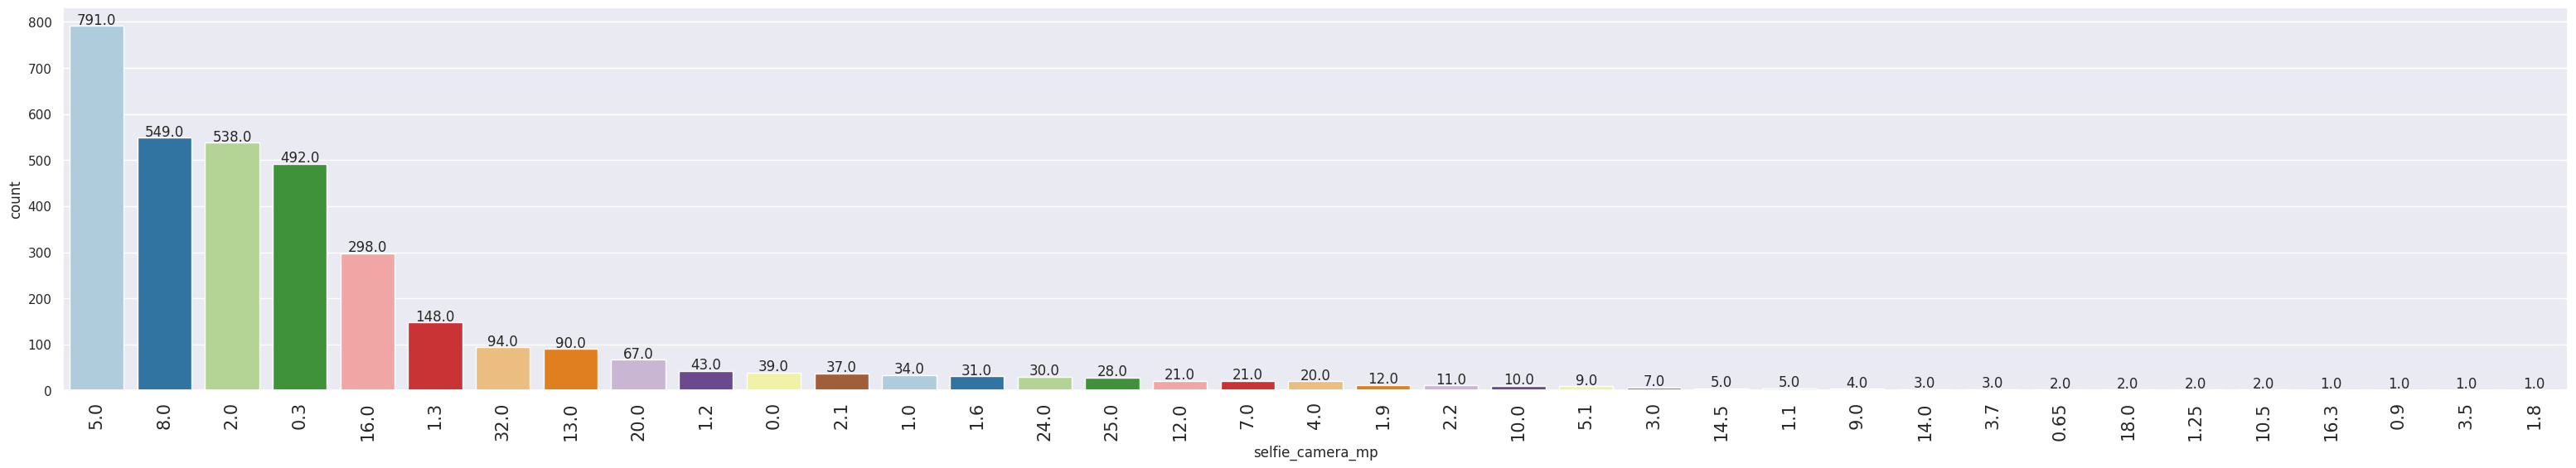

In [ ]:
histogram_boxplot(data=df,feature='selfie_camera_mp',kde=True)  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'


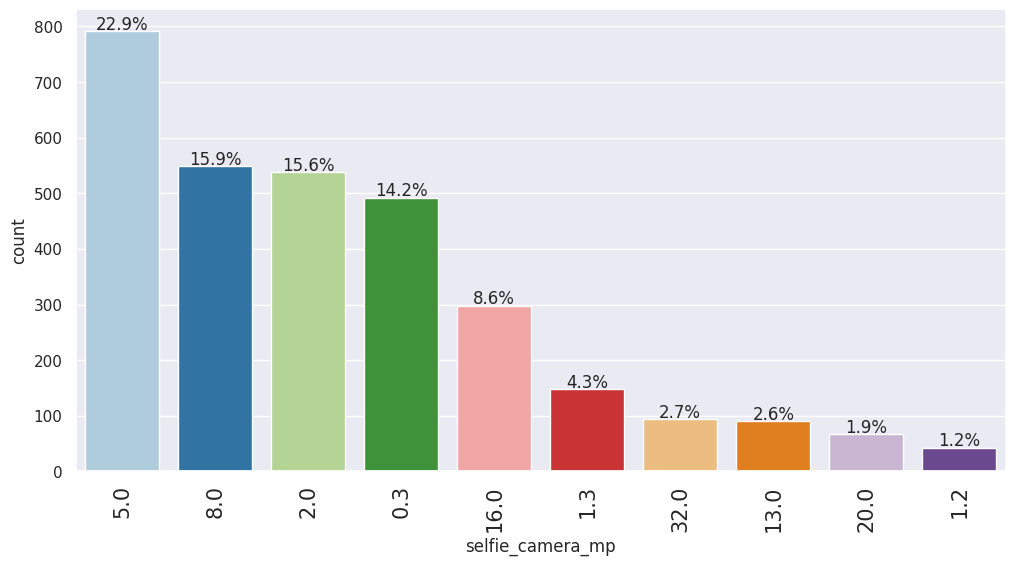

In [ ]:
labeled_barplot(data=df,feature='selfie_camera_mp',perc=True,n=10)




*   Selfie camera megapixel lies in the range of 0 to 30 approximately.
*   There are multiple peaks at 5 mp,8 mp ,2 mp and 3 mp.
*   From bar plot we infer that 23 percent of cameras have 5 mp,
    approximately 16 percent of cameras have 8 mp,
    approximately 16 percent of cameras have 2 mp,
    approximately 15 percent of cameras have 0.3 mp.



**`int_memory`**

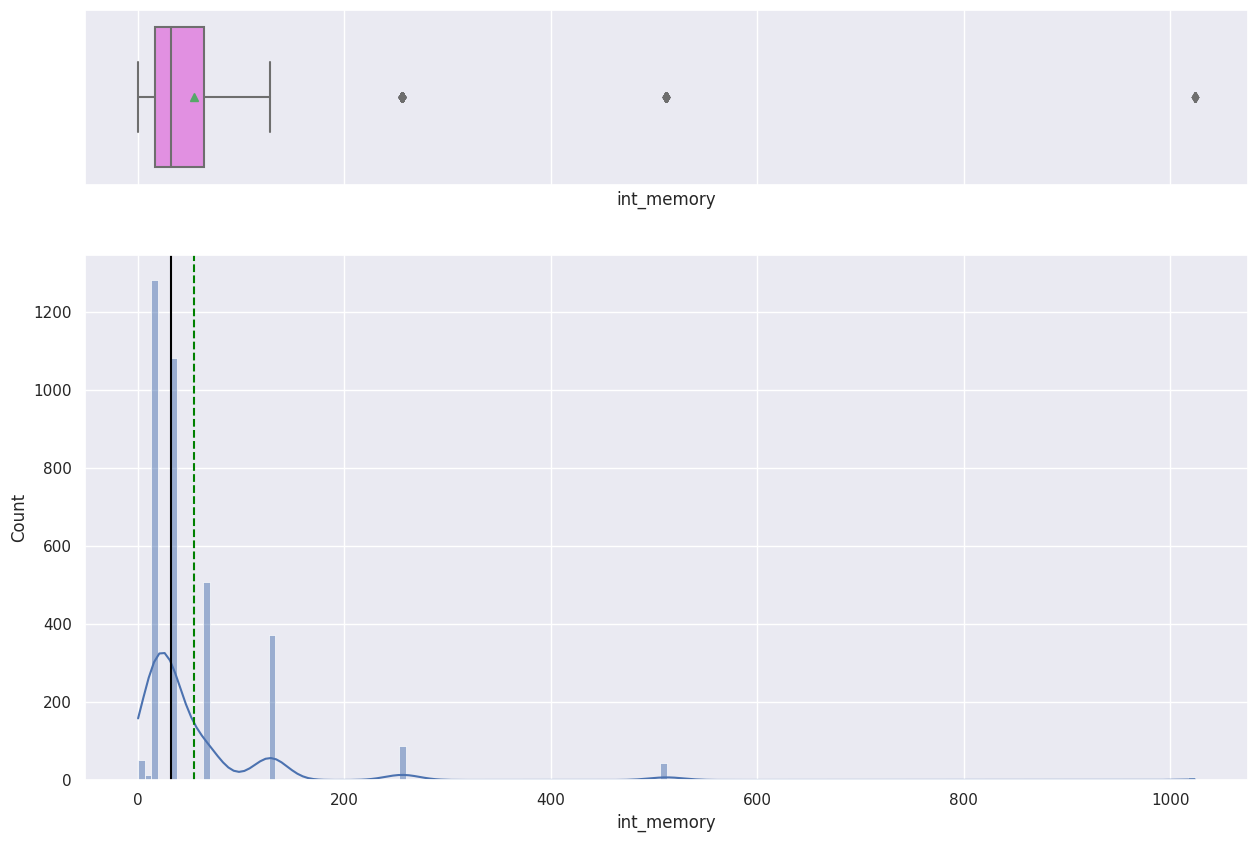

In [ ]:
histogram_boxplot(data=df,feature='int_memory',kde=True)  ## Complete the code to create histogram_boxplot for 'int_memory'

In [ ]:
df[(df['int_memory']==128)&(df['main_camera_mp']==48)]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
210         ZTE  Android        16.89  yes  no            48.0   
3240   Motorola  Android        15.34  yes  no            48.0   
3381   Motorola  Android        15.34  yes  no            48.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
210               16.0       128.0  8.0   5000.0   215.0          2019   
3240              25.0       128.0  4.0   3600.0   165.0          2019   
3381              25.0       128.0  4.0   3600.0   165.0          2019   

      days_used  normalized_used_price  normalized_new_price  
210         336               5.668052              6.708780  
3240        371               5.325933              5.541224  
3381        422               5.331027              5.541224

In [ ]:
arr = df['brand_name'].value_counts()

arr

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

In [ ]:
df[df['brand_name']=='OnePlus']

brand_name       os  screen_size   4g   5g  main_camera_mp  \
118     OnePlus  Android        16.64  yes  yes             NaN   
119     OnePlus  Android        16.64  yes  yes             NaN   
120     OnePlus  Android        16.94  yes  yes             NaN   
121     OnePlus  Android        16.94  yes  yes             NaN   
337     OnePlus  Android        16.64  yes  yes             NaN   
338     OnePlus  Android        16.64  yes  yes             NaN   
339     OnePlus  Android        16.94  yes  yes             NaN   
340     OnePlus  Android        16.94  yes  yes             NaN   
2111    OnePlus  Android        16.28  yes   no             NaN   
2112    OnePlus  Android        16.28  yes   no             NaN   
2113    OnePlus  Android        15.95  yes   no             NaN   
2114    OnePlus  Android        15.27  yes   no             NaN   
2115    OnePlus  Android        12.83  yes   no             NaN   
2116    OnePlus  Android        12.83  yes   no            16.0   
2117    OnePlus  Android        12.70  yes   no            13.0   
2118    OnePlus  Android        12.83  yes   no            16.0   
2119    OnePlus  Android        12.83  yes   no            13.0   
2120    OnePlus  Android        12.83  yes   no            13.0   
3248    OnePlus  Android        16.94  yes   no             NaN   
3249    OnePlus  Android        16.64  yes   no             NaN   
3389    OnePlus  Android        16.94  yes   no             NaN   
3390    OnePlus  Android        16.64  yes   no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
118               16.0       128.0   8.0   4300.0   180.0          2020   
119               16.0       128.0   8.0   4300.0   180.0          2020   
120               16.0       256.0  12.0   4085.0   206.0          2019   
121               16.0       128.0   6.0   4000.0   206.0          2019   
337               16.0       128.0   8.0   4300.0   180.0          2020   
338               16.0       128.0   8.0   4300.0   180.0          2020   
339               16.0       256.0  12.0   4085.0   206.0          2019   
340               16.0       128.0   6.0   4000.0   206.0          2019   
2111              16.0       256.0   4.0   3700.0   185.0          2018   
2112              16.0       256.0   4.0   3700.0   185.0          2018   
2113              16.0       128.0   4.0   3300.0   177.0          2018   
2114              16.0       128.0   4.0   3300.0   162.0          2017   
2115              16.0       128.0   4.0   3300.0   153.0          2017   
2116              16.0        64.0   4.0   3400.0   158.0          2016   
2117               8.0        16.0   4.0   2525.0   138.0          2015   
2118               8.0        64.0   4.0   3000.0   158.0          2016   
2119               5.0        16.0   4.0   3300.0   175.0          2015   
2120               5.0        16.0   4.0   3100.0   162.0          2014   
3248              16.0       256.0   8.0   4085.0   206.0          2019   
3249              16.0       128.0   8.0   3800.0   190.0          2019   
3389              16.0       256.0   8.0   4085.0   206.0          2019   
3390              16.0       128.0   8.0   3800.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
118         110               5.620944              6.609309  
119         208               5.288166              6.474107  
120         458               5.713403              6.686161  
121         294               5.670984              6.686647  
337         186               5.482928              6.605054  
338         232               5.235165              6.478525  
339         280               5.079850              6.685761  
340         523               5.342526              6.684362  
2111        489               5.065755              6.552422  
2112        496               5.000046              6.309445  
2113        386               5.380404      

In [ ]:
df[df.brand_name.str.startswith('One')]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
118     OnePlus  Android        16.64  yes  yes             NaN   
119     OnePlus  Android        16.64  yes  yes             NaN   
120     OnePlus  Android        16.94  yes  yes             NaN   
121     OnePlus  Android        16.94  yes  yes             NaN   
337     OnePlus  Android        16.64  yes  yes             NaN   
338     OnePlus  Android        16.64  yes  yes             NaN   
339     OnePlus  Android        16.94  yes  yes             NaN   
340     OnePlus  Android        16.94  yes  yes             NaN   
2111    OnePlus  Android        16.28  yes   no             NaN   
2112    OnePlus  Android        16.28  yes   no             NaN   
2113    OnePlus  Android        15.95  yes   no             NaN   
2114    OnePlus  Android        15.27  yes   no             NaN   
2115    OnePlus  Android        12.83  yes   no             NaN   
2116    OnePlus  Android        12.83  yes   no            16.0   
2117    OnePlus  Android        12.70  yes   no            13.0   
2118    OnePlus  Android        12.83  yes   no            16.0   
2119    OnePlus  Android        12.83  yes   no            13.0   
2120    OnePlus  Android        12.83  yes   no            13.0   
3248    OnePlus  Android        16.94  yes   no             NaN   
3249    OnePlus  Android        16.64  yes   no             NaN   
3389    OnePlus  Android        16.94  yes   no             NaN   
3390    OnePlus  Android        16.64  yes   no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
118               16.0       128.0   8.0   4300.0   180.0          2020   
119               16.0       128.0   8.0   4300.0   180.0          2020   
120               16.0       256.0  12.0   4085.0   206.0          2019   
121               16.0       128.0   6.0   4000.0   206.0          2019   
337               16.0       128.0   8.0   4300.0   180.0          2020   
338               16.0       128.0   8.0   4300.0   180.0          2020   
339               16.0       256.0  12.0   4085.0   206.0          2019   
340               16.0       128.0   6.0   4000.0   206.0          2019   
2111              16.0       256.0   4.0   3700.0   185.0          2018   
2112              16.0       256.0   4.0   3700.0   185.0          2018   
2113              16.0       128.0   4.0   3300.0   177.0          2018   
2114              16.0       128.0   4.0   3300.0   162.0          2017   
2115              16.0       128.0   4.0   3300.0   153.0          2017   
2116              16.0        64.0   4.0   3400.0   158.0          2016   
2117               8.0        16.0   4.0   2525.0   138.0          2015   
2118               8.0        64.0   4.0   3000.0   158.0          2016   
2119               5.0        16.0   4.0   3300.0   175.0          2015   
2120               5.0        16.0   4.0   3100.0   162.0          2014   
3248              16.0       256.0   8.0   4085.0   206.0          2019   
3249              16.0       128.0   8.0   3800.0   190.0          2019   
3389              16.0       256.0   8.0   4085.0   206.0          2019   
3390              16.0       128.0   8.0   3800.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
118         110               5.620944              6.609309  
119         208               5.288166              6.474107  
120         458               5.713403              6.686161  
121         294               5.670984              6.686647  
337         186               5.482928              6.605054  
338         232               5.235165              6.478525  
339         280               5.079850              6.685761  
340         523               5.342526              6.684362  
2111        489               5.065755              6.552422  
2112        496               5.000046              6.309445  
2113        386               5.380404      

**`ram`**

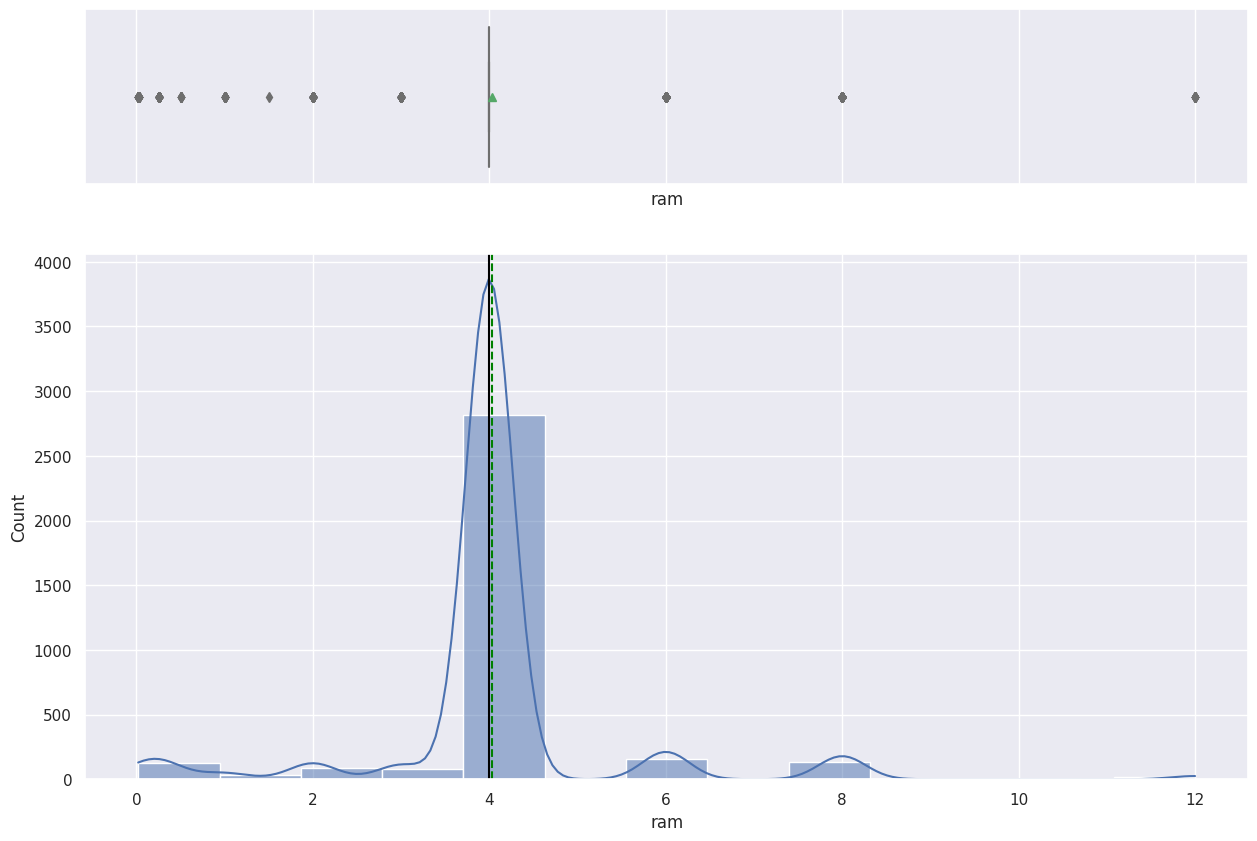

In [ ]:
histogram_boxplot(data=df,feature='ram',kde=True)  ## Complete the code to create histogram_boxplot for 'ram'

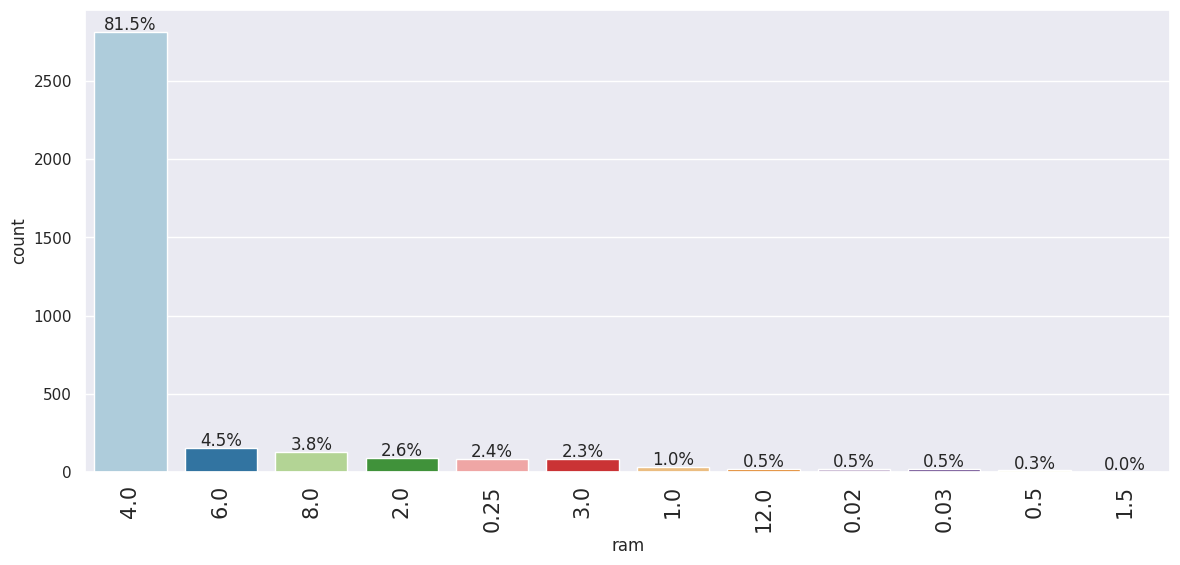

In [ ]:
labeled_barplot(data=df,feature='ram',perc=True)

From bar plot , we infer that approximately 81% of phones have 'RAM' of 4 GB.
Data does not show a clear pattern.



**`weight`**

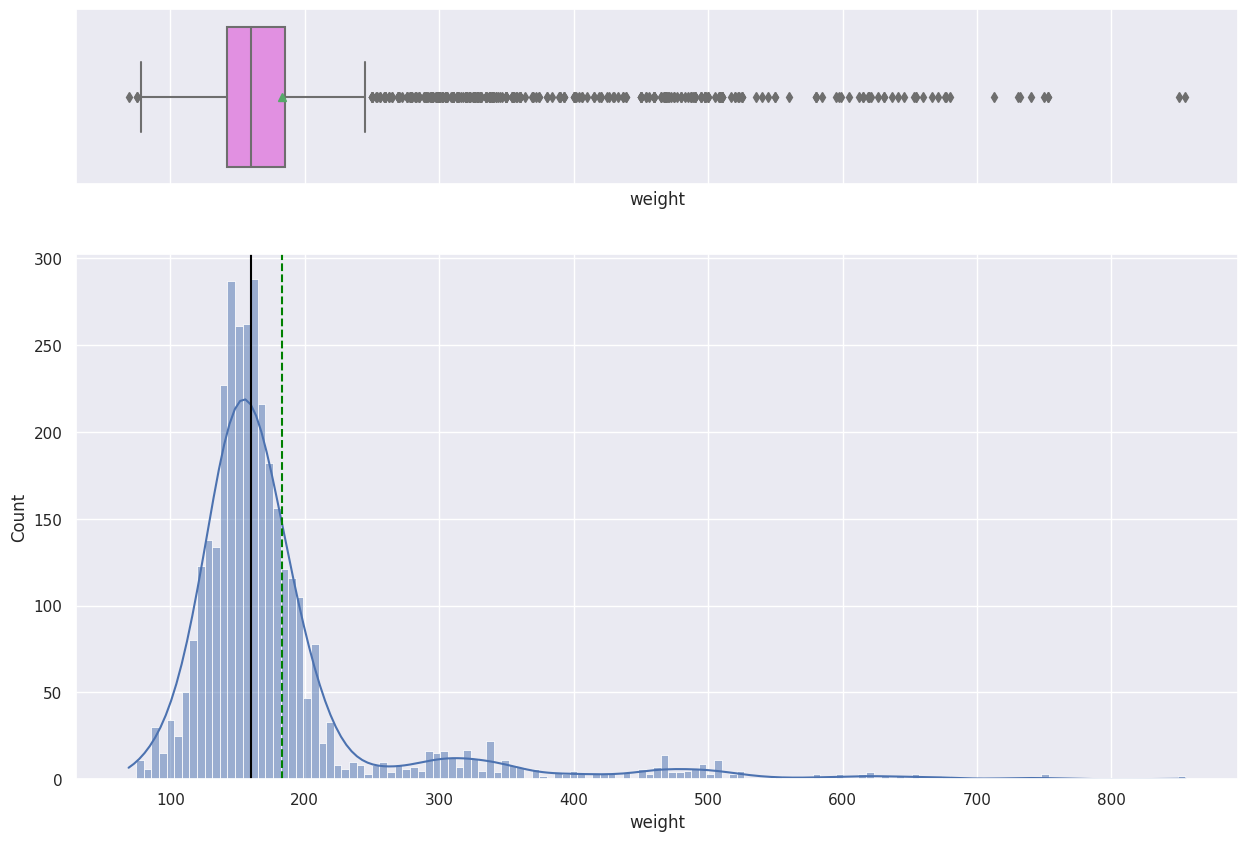

In [ ]:
histogram_boxplot(data=df,feature='weight',kde=True)  ## Complete the code to create histogram_boxplot for 'weight'

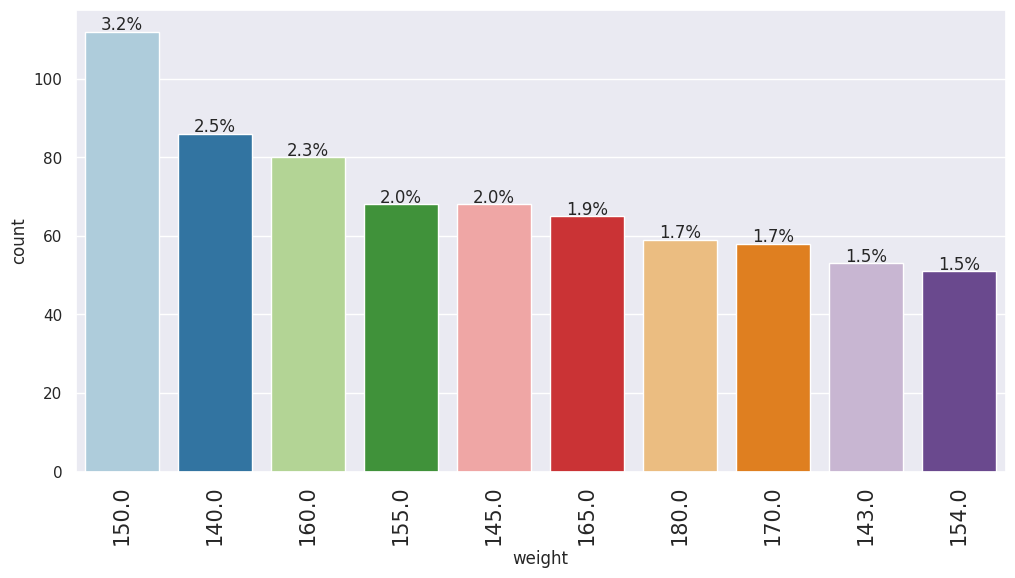

In [ ]:
labeled_barplot(data,'weight',perc=True,n=10)

*   Weight distribution is skewed to right.
*   weight disstribution has a range 100-300 gms with lot of outliers
*   Mean weight of phone lies close to 200 gm whereas the 75 percentile of phones have less than 200 gm weight.

**`battery`**

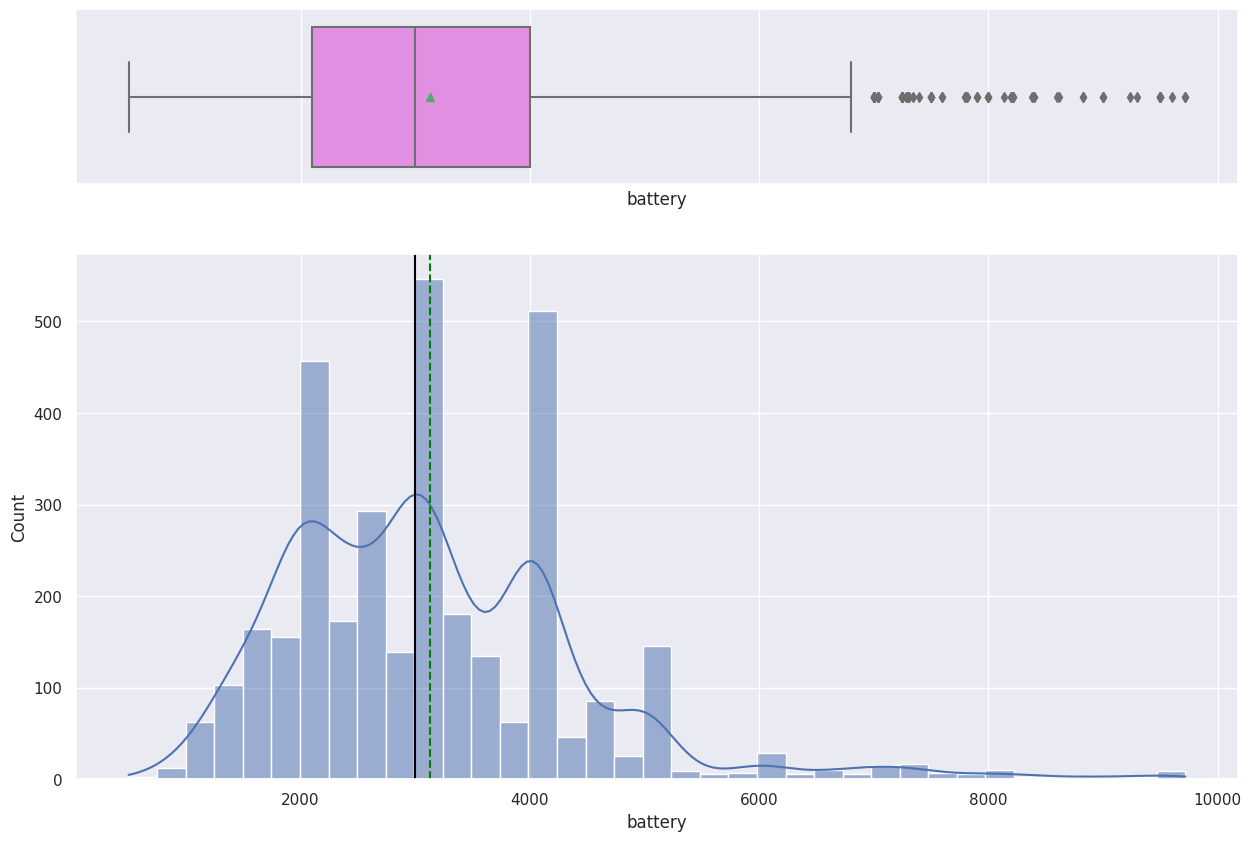

In [ ]:
histogram_boxplot(data=df,feature='battery',kde=True)  ## Complete the code to create histogram_boxplot for 'battery'

* Battery capacity data is skewed to right , with multiple modes.
* The battery capacicty lies in the range of 500-6000 with lot of outliers.
* It has 3 peaks at 2000,3000 and 4000 mAh


**`days_used`**

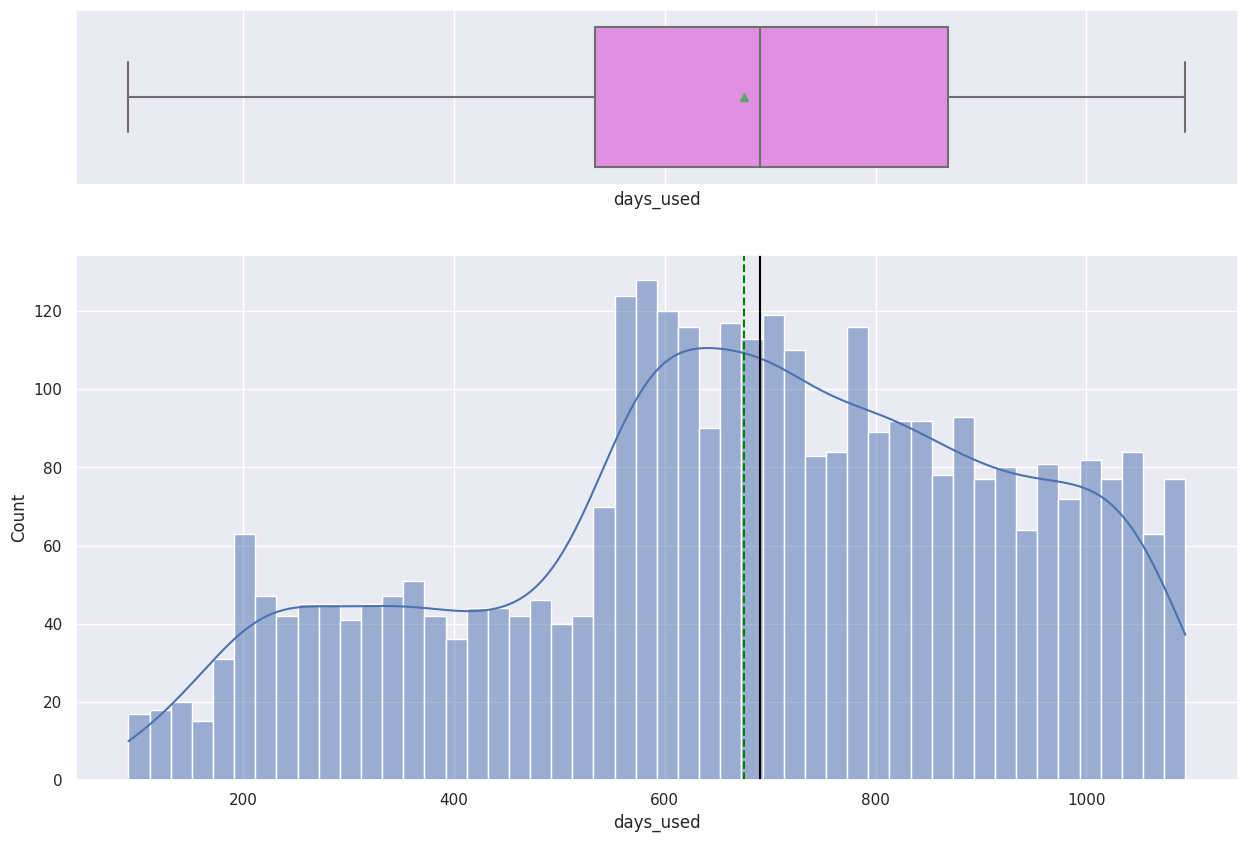

In [ ]:
histogram_boxplot(data=df,feature='days_used',kde=True,bins=50)  ## Complete the code to create histogram_boxplot for 'days_used'

* Days used lies int he range of 90-1095 days.
* The mean number of days used is applroximately 675.

**`brand_name`**

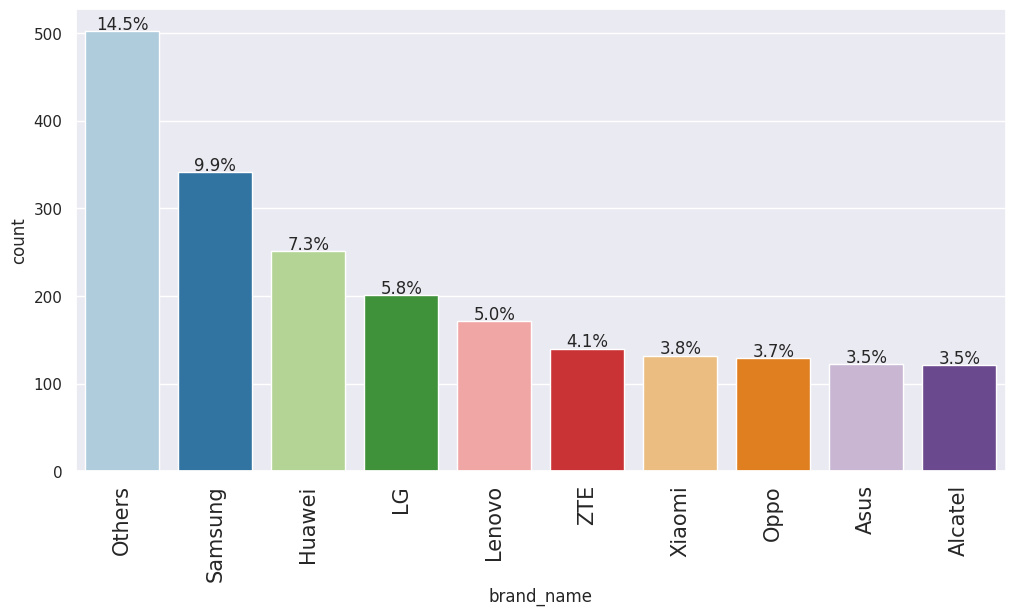

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

* Other brands have major share of phone ,market close to 14%
* Samsung holds the next major share of close to 10%


**`os`**

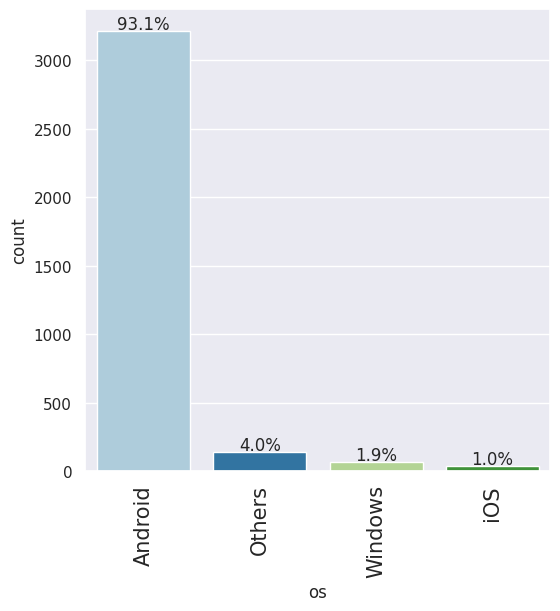

In [ ]:
labeled_barplot(df,'os',True) ## Complete the code to create labeled_barplot for 'os'

we infer that 93% of phones use 'Android' as their os.


**`4g`**

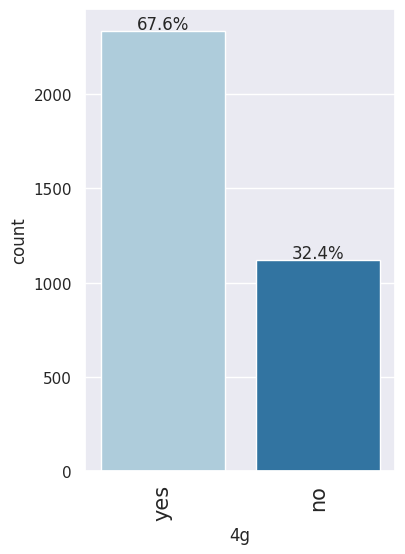

In [ ]:
labeled_barplot(df,'4g',True) ## Complete the code to create labeled_barplot for '4g'

We infer that 67% of phones are 4g.

**`5g`**

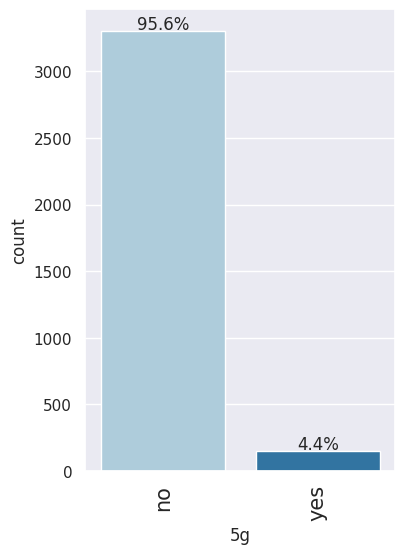

In [ ]:
labeled_barplot(df,'5g',True) ## Complete the code to create labeled_barplot for '5g'

We infer that 96% of phones are 5g.

**`release_year`**

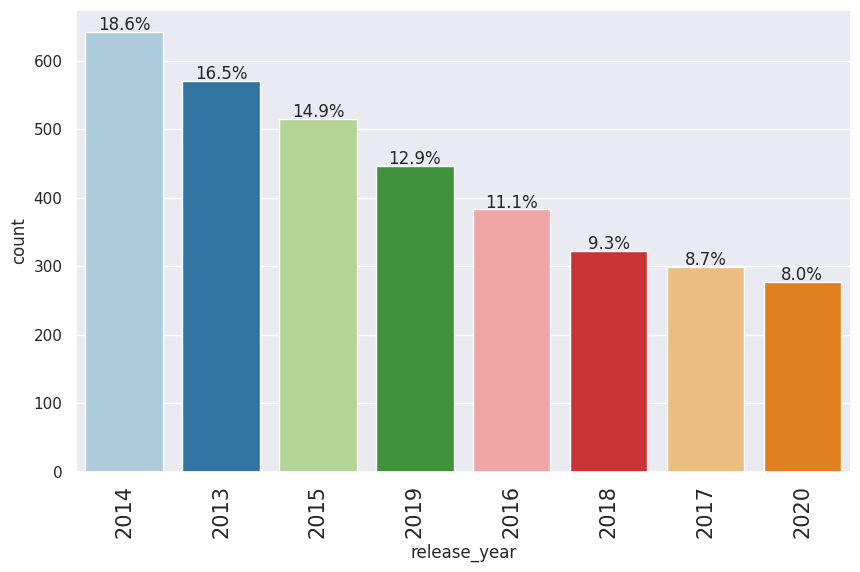

In [ ]:
labeled_barplot(df,'release_year',perc=True) ## Complete the code to create labeled_barplot for 'release_year'

It is observed that approximately 19% of phones in this data are released in 2014, followed by 17% release in 2013.

<Axes: >

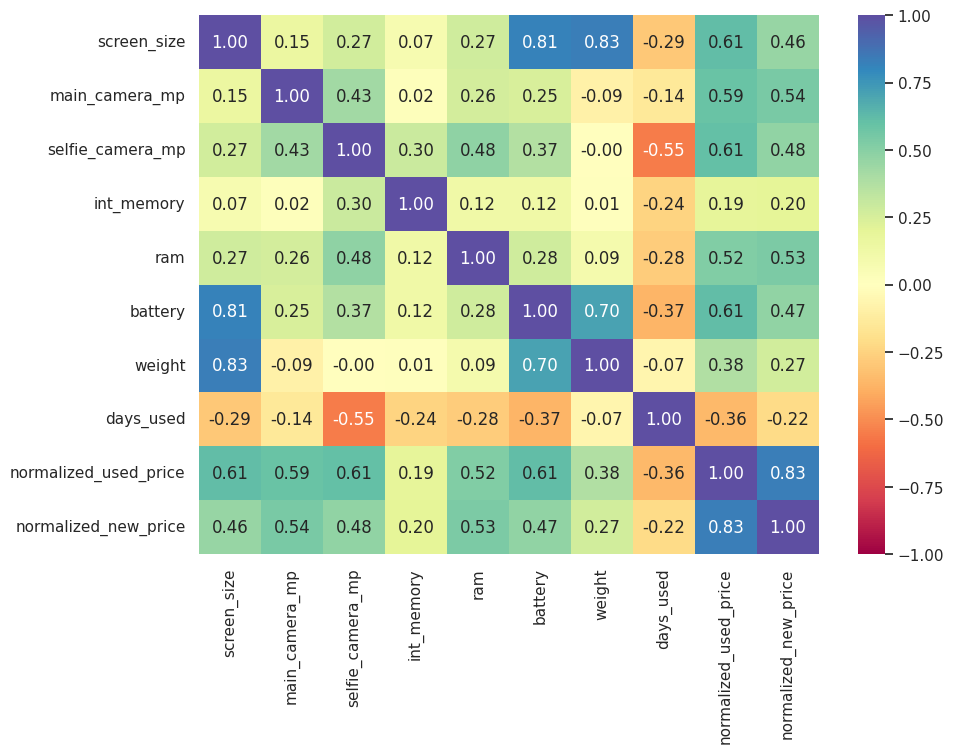

In [ ]:
cor_var = df.select_dtypes(include='number').columns.to_list()
cor_var.remove('release_year')

plt.figure(figsize=(10,7))
sns.heatmap(data=df[cor_var].corr(),annot=True,
            vmin=-1,vmax=1,fmt='.2f',cbar=True,cmap='Spectral')

* The target variable  is 'normalized_used_price'
* We infer that 'normalized_used_price' is positively corelated
 with 'normalized_new_price'
* We infer that 'normalized_used_price' is negatively corelated
 with 'days_used'. With increase in number of days used, 'used_price' of phone decreases.
* We infer that 'normalized_used_price' is fairly positively corelated
 with 'screen_size','main_camera_mp' , 'selfie_camera_mp', 'battery' and 'RAM'.
* We infer that 'screen_size' is fairly positively corelated
 with 'battery' and 'RAM'.
* We infer that 'battery' is fairly positively corelated
 with 'weight'.


### Bivariate Analysis

**Correlation Check**

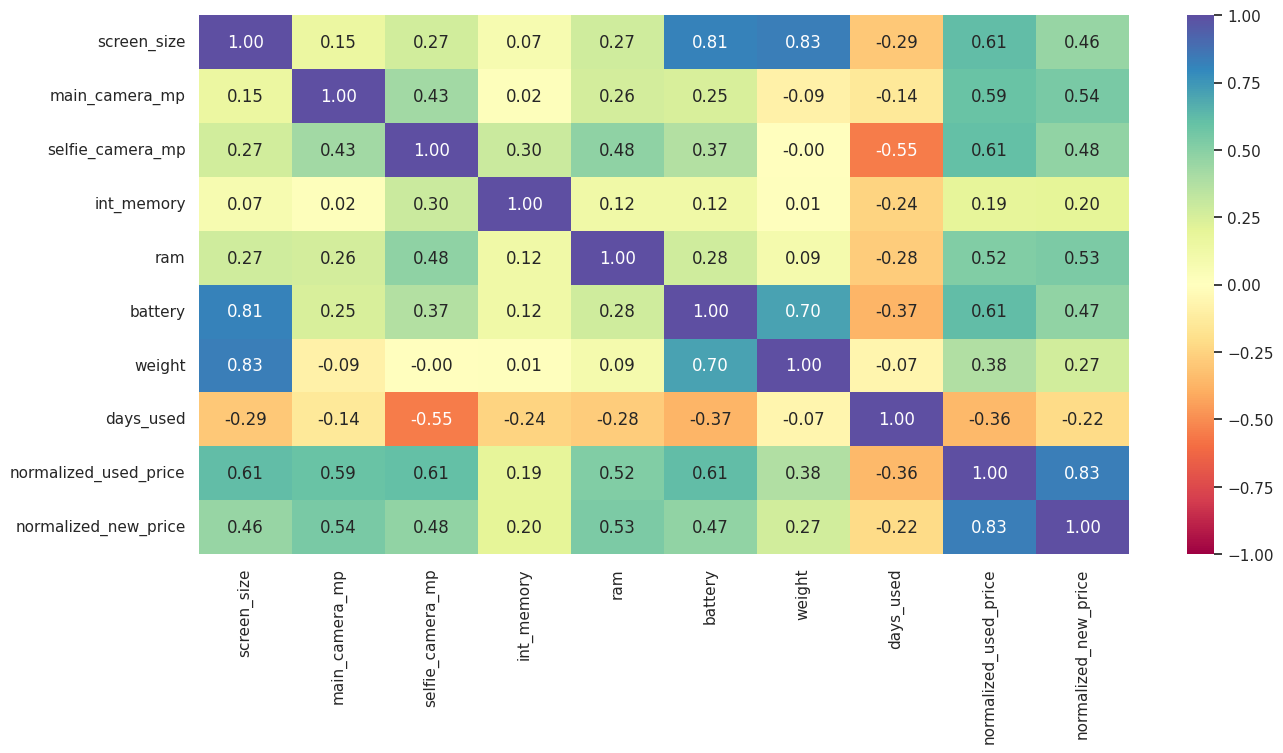

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

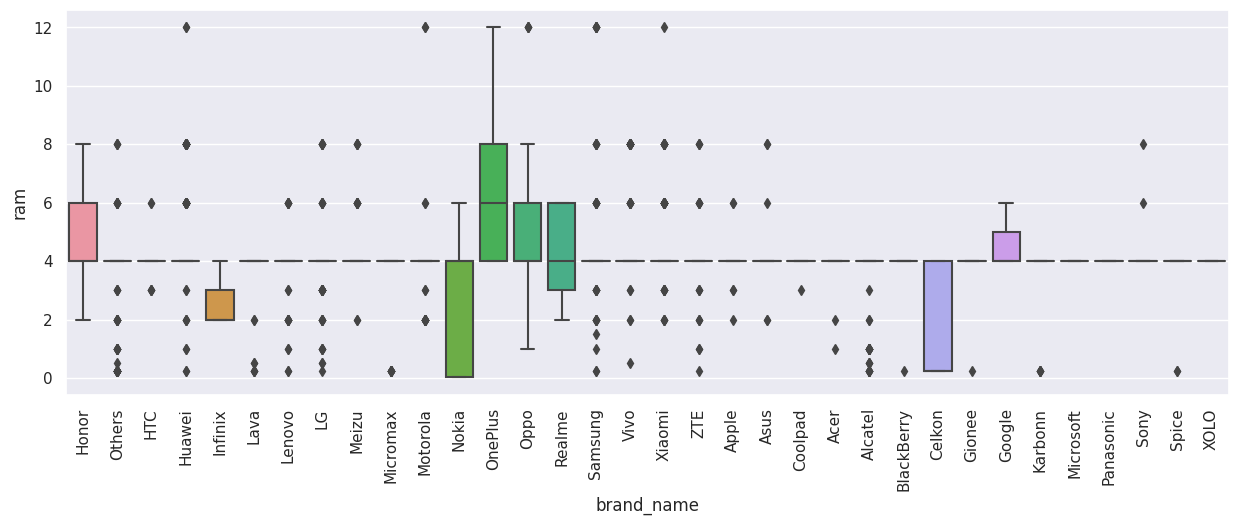

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

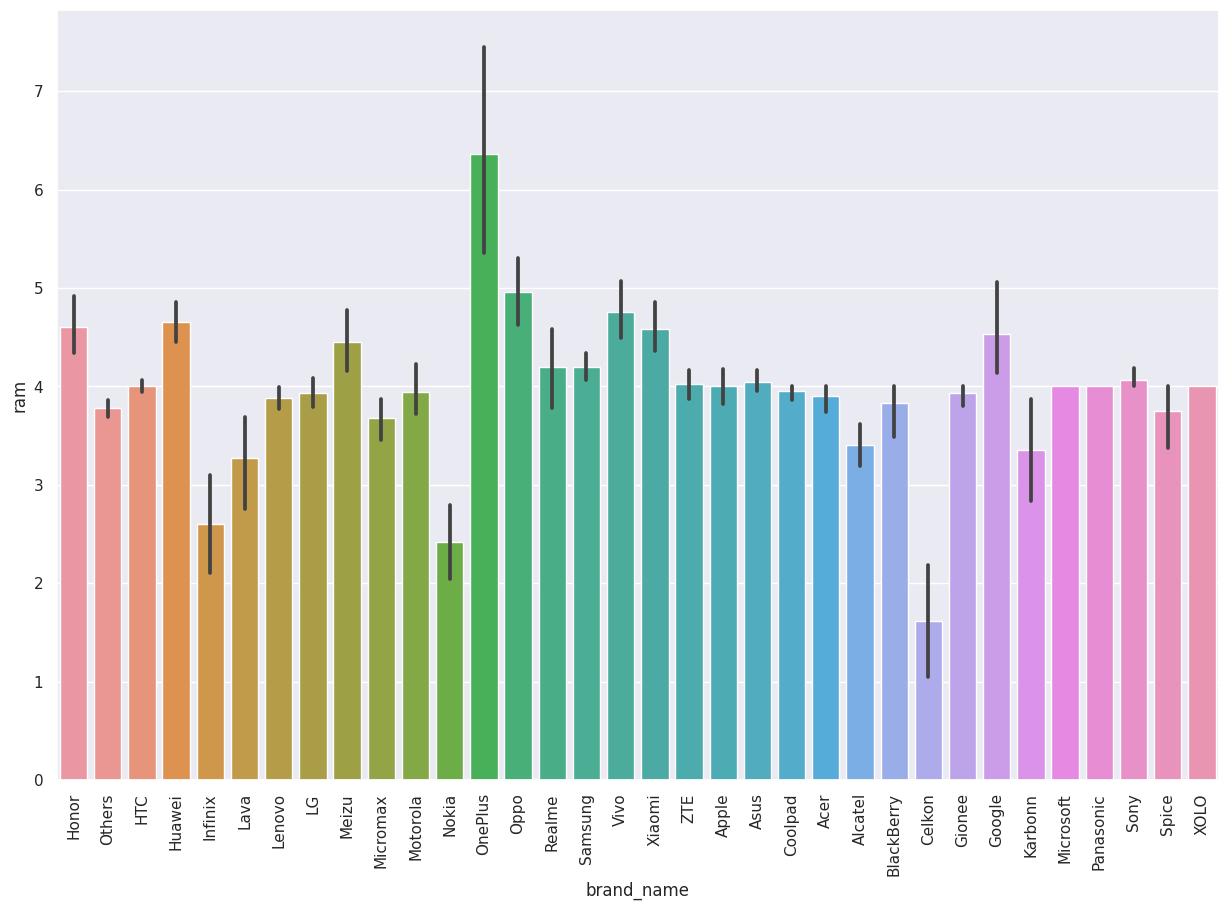

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('brand_name')['ram'].mean()

brand_name
Acer          3.901961
Alcatel       3.407025
Apple         4.000000
Asus          4.049180
BlackBerry    3.829545
Celkon        1.613636
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.603448
Huawei        4.655378
Infinix       2.600000
Karbonn       3.353448
LG            3.936567
Lava          3.277778
Lenovo        3.885965
Meizu         4.451613
Micromax      3.679487
Microsoft     4.000000
Motorola      3.943396
Nokia         2.420294
OnePlus       6.363636
Oppo          4.961240
Others        3.777888
Panasonic     4.000000
Realme        4.195122
Samsung       4.199413
Sony          4.069767
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.583333
ZTE           4.023214
Name: ram, dtype: float64

In [ ]:
df['ram'].mean()

4.036121739130435

* Let us look at the distribution of RAM.
* Brands like 'Huawei' , 'Motorola', 'Samsung', 'Xiaomi' have higher RAM like  
  12 GB RAM.
*

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

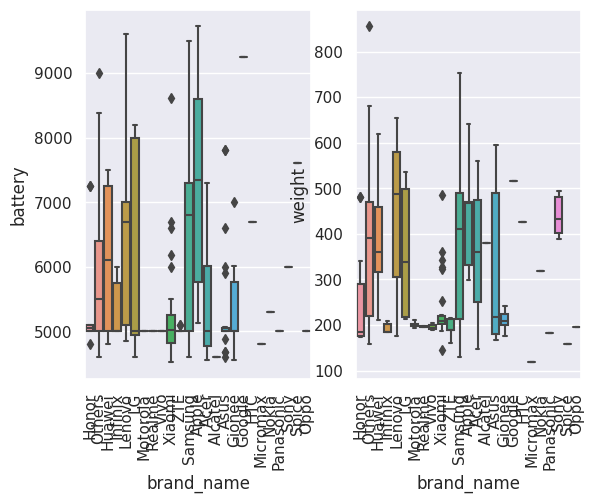

In [ ]:

plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery,x='brand_name',y='battery') ## Complete the code to create a boxplot for 'brand_name' and 'battery'
plt.xticks(rotation=90)
plt.show()

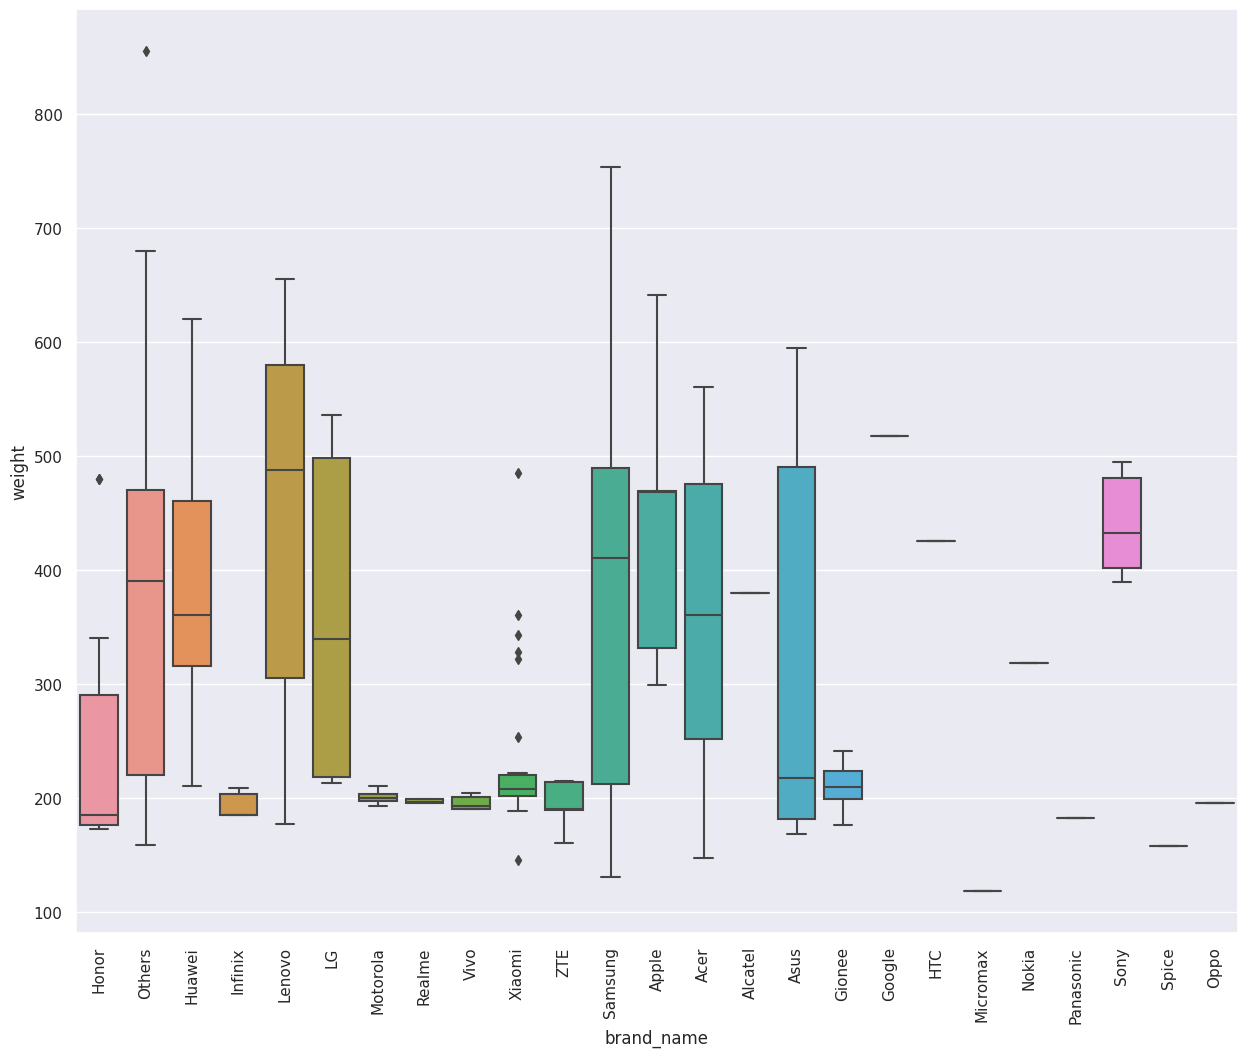

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df_large_battery,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show()

*There are 341 phones which has large battery.

*We infer that Apple phones have the highest 50 percentile score of battery with 7000 mAh, followed by Lenovo and Huawei.

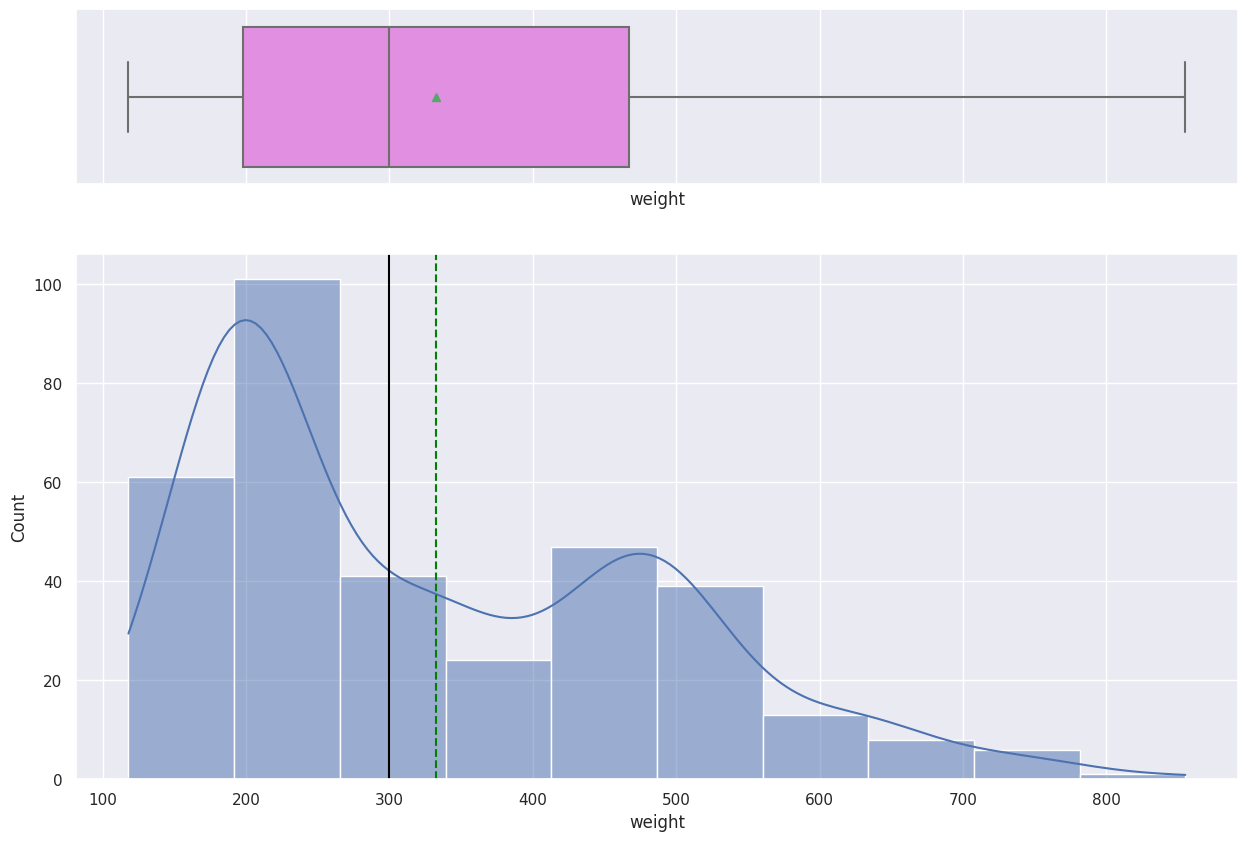

In [ ]:
histogram_boxplot(data=df_large_battery,feature='weight',kde=True)

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54] ##checking for ph0nes greater than 6 inches
df_large_screen.shape

(1099, 15)

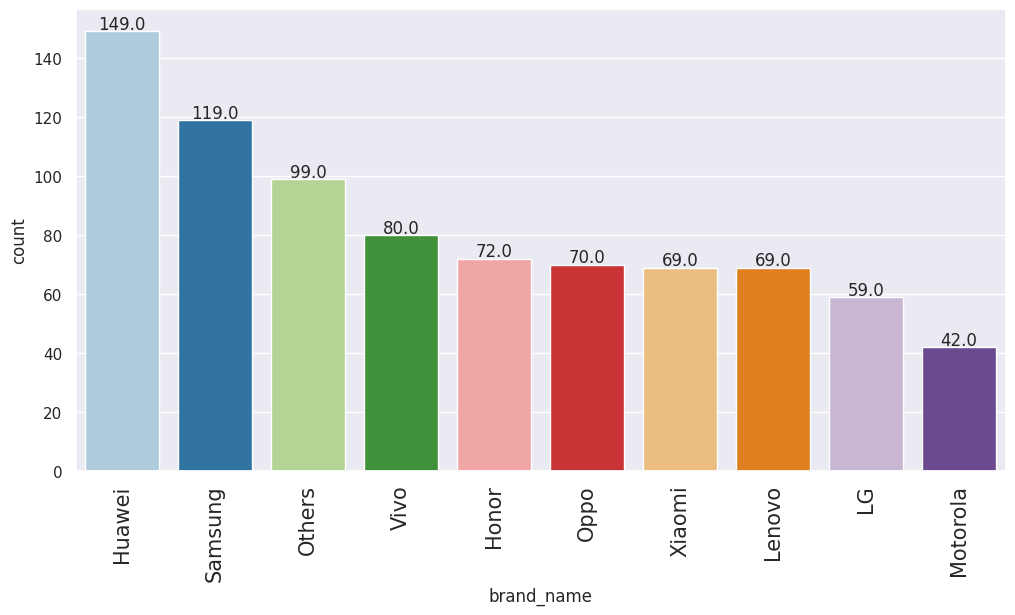

In [ ]:
labeled_barplot(data=df_large_screen,feature='brand_name',perc=False,n=10) ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

* There are 1099 phones which has large screen.

* We infer that Huawei phones hold 14% share of market of phones with large
  screens,followed by Samsung and Others.


**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

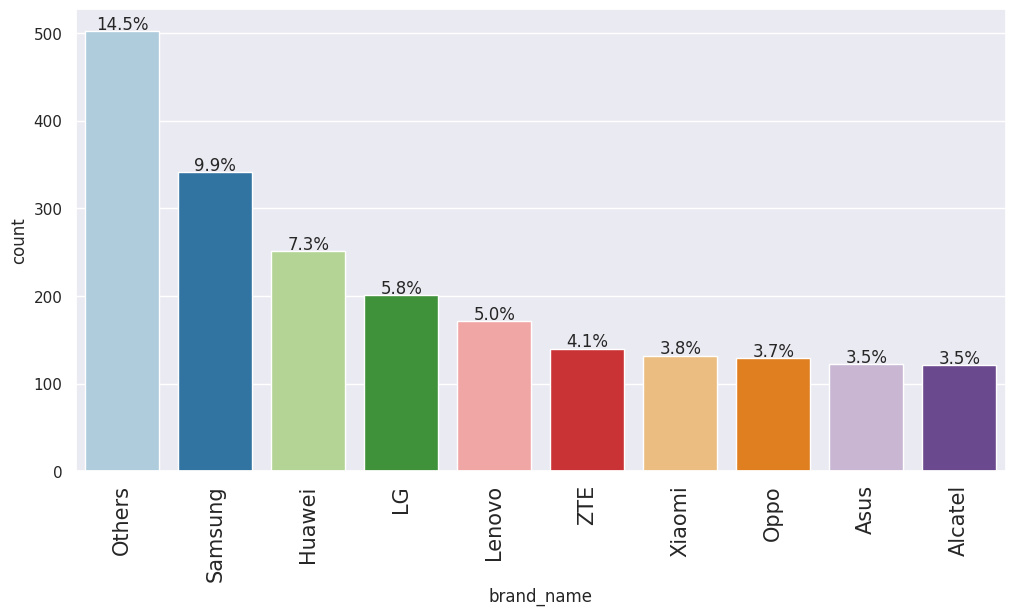

In [ ]:
labeled_barplot(df,'brand_name',True,10) ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

* There are 655 phones which has large selfie camera.
* We infer that other phones hold 14% share of market of phones with large
  selfie camera, followed by SAMSUNG AND HUAWEI.


**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

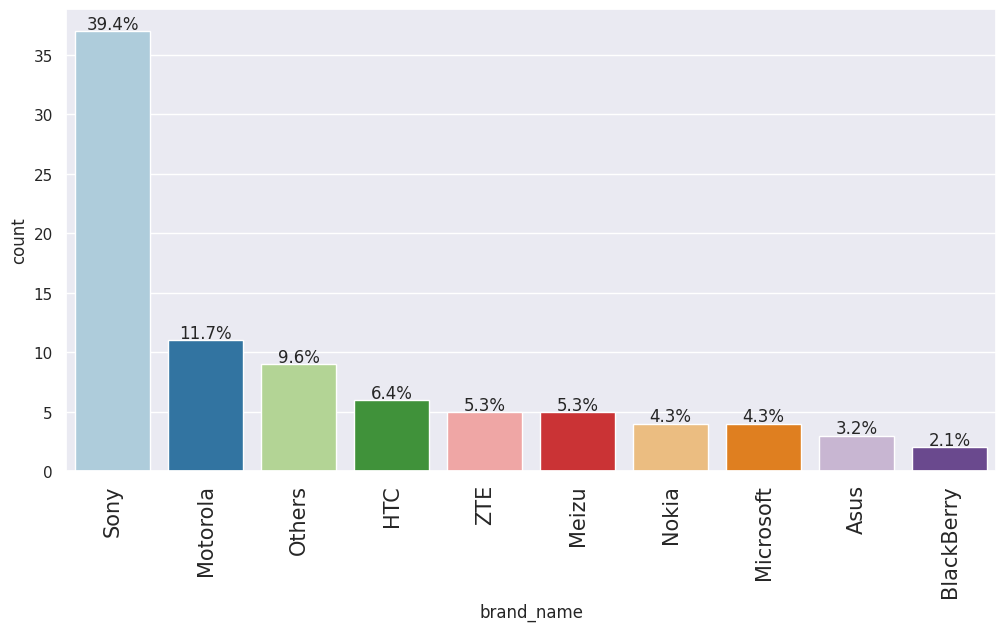

In [ ]:
 ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe
labeled_barplot(df_main_camera,'brand_name',True,10)

* There are 94 phones which has camera pixels higher than 16 mp.
* We infer that close to 39% of high main_camera_mp is held by 'Sony'
  followed by 'Motorola' and 'Others'.

In [ ]:
df.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

**Let's see how the price of used devices varies across the years.**

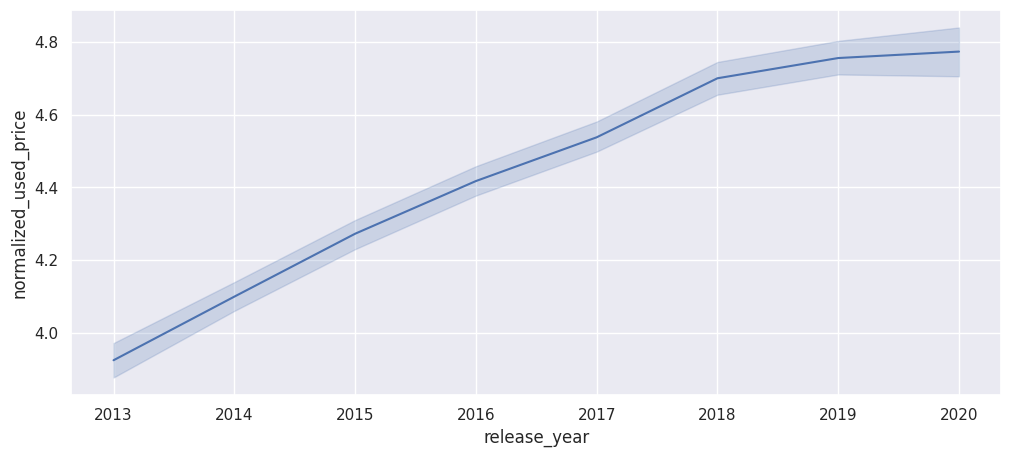

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df,x='release_year',y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

From the line plot we infer there is a steady increase of used_price of phones over the years.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

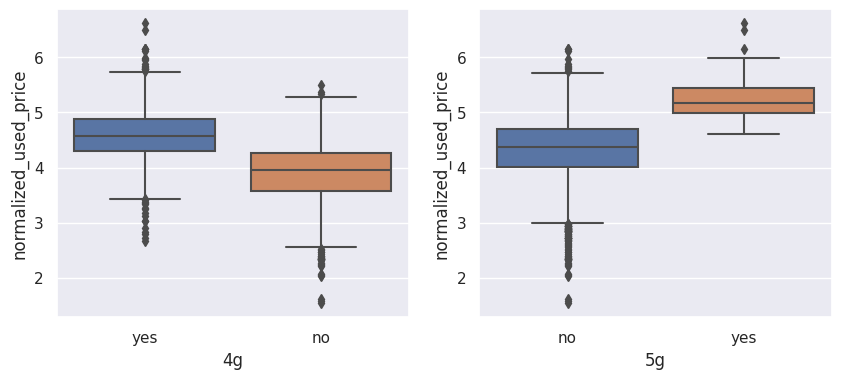

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

From the box plots we infer that phones with 5g has an average price of 5 units
whereas phones with 4g has an average price of 4.5 units.

we infer that 5g phones avergae price is higher than 4g phones average used price.

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values in all the columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df1['main_camera_mp'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3449     True
3450    False
3451    False
3452    False
3453    False
Name: main_camera_mp, Length: 3454, dtype: bool

In [ ]:
df1[(df1['brand_name']=='Asus')&(df1['main_camera_mp'].isnull())]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
697        Asus  Android        15.90  yes  no             NaN   
698        Asus  Android        15.90  yes  no             NaN   
3448       Asus  Android        16.74  yes  no             NaN   
3449       Asus  Android        15.34  yes  no             NaN   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
697                8.0        32.0  4.0   4000.0   165.0          2019   
698                8.0        64.0  4.0   4000.0   165.0          2019   
3448              24.0       128.0  8.0   6000.0   240.0          2019   
3449               8.0        64.0  6.0   5000.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
697         524               4.727919              5.701346  
698         397               4.462800              5.738281  
3448        325               5.715316              7.059317  
3449        232               4.492337              6.483872

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `brand_name`and 'released_year'.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name','release_year'])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df1.iloc[1962,9]

nan

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df1[df1['main_camera_mp'].isnull()]


brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android        17.32  yes  no             NaN   
60     Infinix  Android        15.39  yes  no             NaN   
61     Infinix  Android        15.39  yes  no             NaN   
62     Infinix  Android        15.39  yes  no             NaN   
63     Infinix  Android        15.29  yes  no             NaN   
278    Infinix  Android        17.32  yes  no             NaN   
279    Infinix  Android        15.39  yes  no             NaN   
280    Infinix  Android        15.39  yes  no             NaN   
281    Infinix  Android        15.39  yes  no             NaN   
282    Infinix  Android        15.29  yes  no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   185.0          2020   
62               16.0        32.0  3.0   4000.0   178.0          2019   
63               16.0        32.0  2.0   4000.0   165.0          2019   
278               8.0        32.0  2.0   6000.0   209.0          2020   
279               8.0        64.0  4.0   5000.0   185.0          2020   
280               8.0        32.0  2.0   5000.0   185.0          2020   
281              16.0        32.0  3.0   4000.0   178.0          2019   
282              16.0        32.0  2.0   4000.0   165.0          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245               4.282068              4.597642  
60         173               4.363608              4.711780  
61         256               4.181439              4.505460  
62         316               4.555244              4.602166  
63         468               4.416670              4.871297  
278        320               4.405133              4.605370  
279        173               4.495913              4.702115  
280        329               4.370713              4.487287  
281        356               4.417997              4.605970  
282        497               4.423289              4.866072

In [ ]:
df1.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3444.0     9.622294     4.755529     0.080000   
selfie_camera_mp       3454.0     6.555067     6.968440     0.000000   
int_memory             3454.0    54.528474    84.934991     0.010000   
ram                    3454.0     4.032620     1.368598     0.020000   
battery                3454.0  3132.577446  1298.884193   500.000000   
weight                 3454.0   182.636856    88.360445    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Complete the code to impute the data with median

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check


In [ ]:
df1

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no            13.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0                  5.0        64.0  3.0   3020.0   146.0        127   
1                 16.0       128.0  8.0   4300.0   213.0        325   
2                  8.0       128.0  8.0   4200.0   213.0        162   
3                  8.0        64.0  6.0   7250.0   480.0        345   
4                  8.0        64.0  3.0   5000.0   185.0        293   
...                ...         ...  ...      ...     ...        ...   
3449               8.0        64.0  6.0   5000.0   190.0        232   
3450               8.0       128.0  8.0   4000.0   200.0        541   
3451               5.0        32.0  3.0   4000.0   165.0        201   
3452               5.0        32.0  2.0   4000.0   160.0        149   
3453               5.0        16.0  2.0   4000.0   168.0        176   

      normalized_used_price  normalized_new_price  years_since_release  
0                  4.307572              4.715100                    1  
1                  5.162097              5.519018                    1  
2                  5.111084              5.884631                    1  
3                  5.135387              5.630961                    1  
4                  4.389995              4.947837                    1  
...                     ...                   ...                  ...  
3449               4.492337              6.483872                    2  
3450               5.037732              6.251538                    3  
3451               4.357350              4.528829                    1  
3452               4.349762              4.624188                    1  
3453               4.132122              4.279994                    1  

[3454 rows x 15 columns]


- Let's check for outliers in the data.

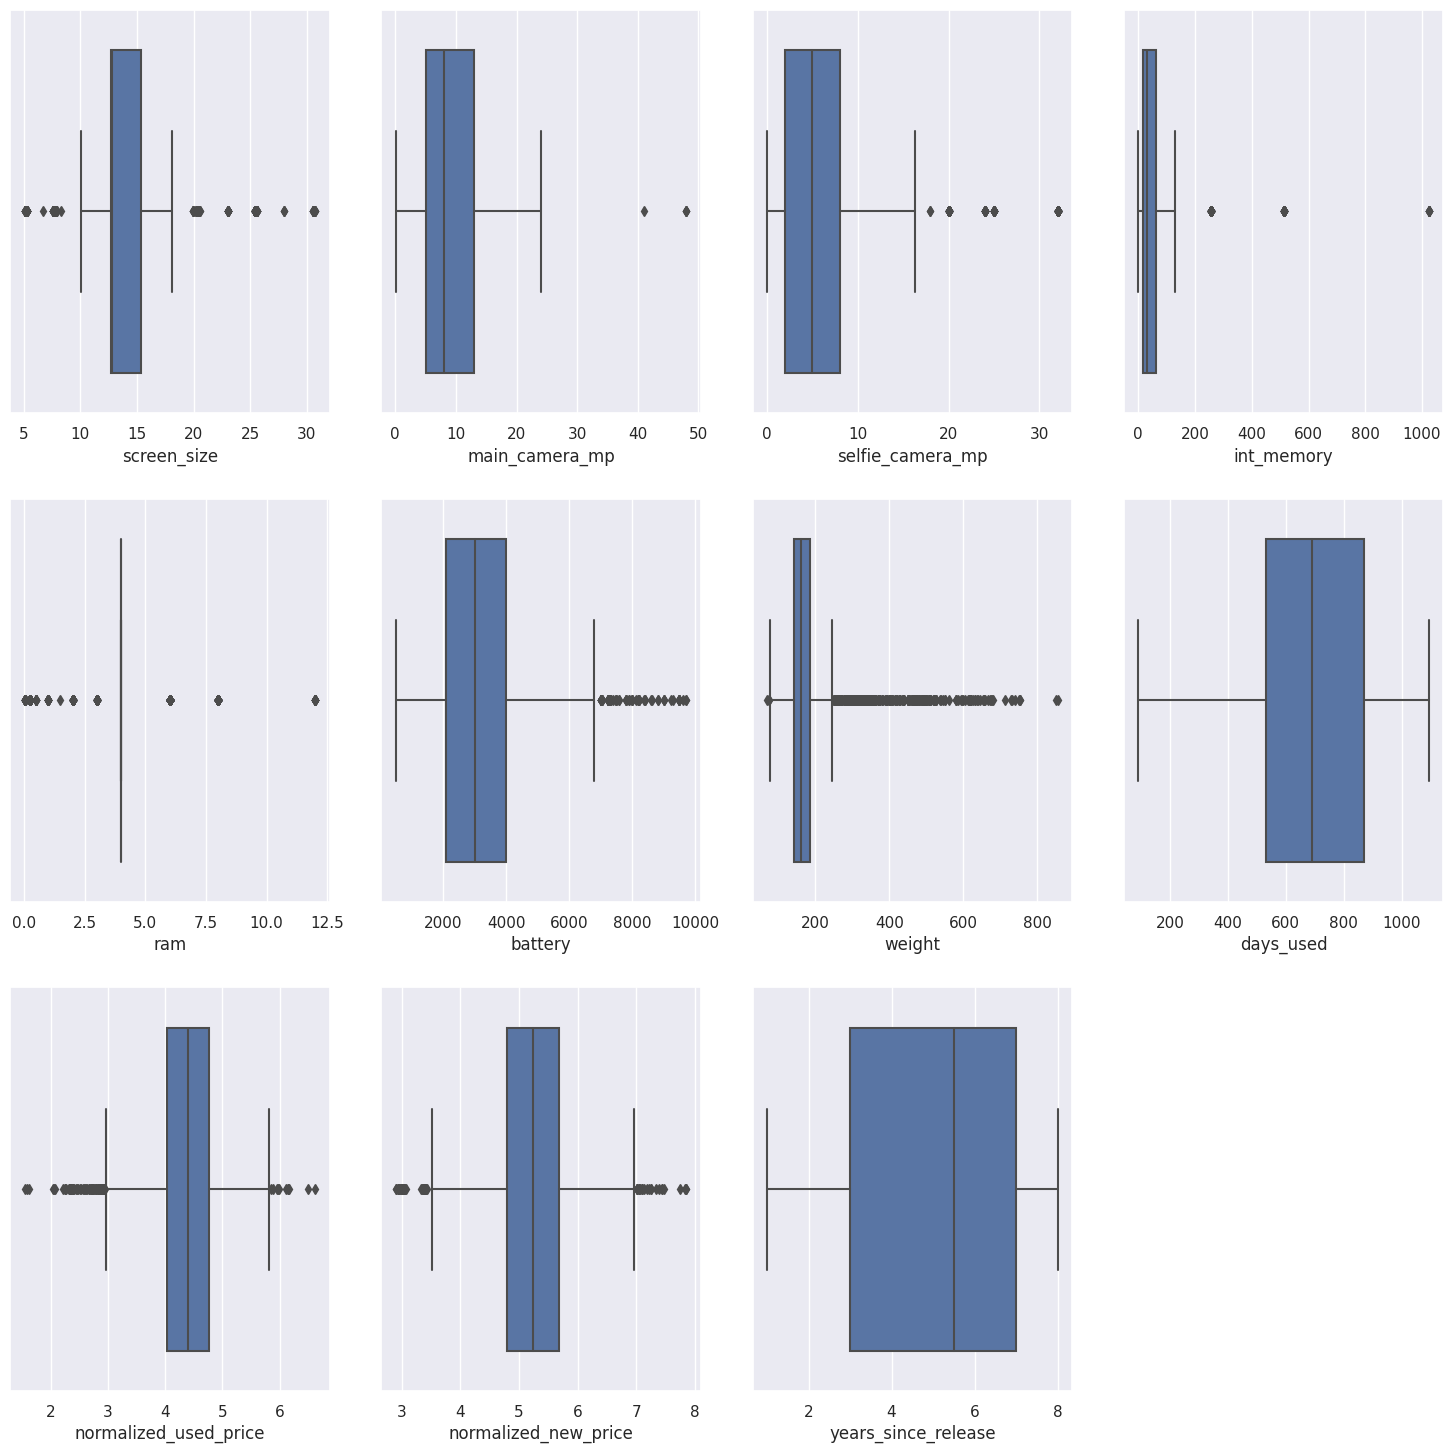

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

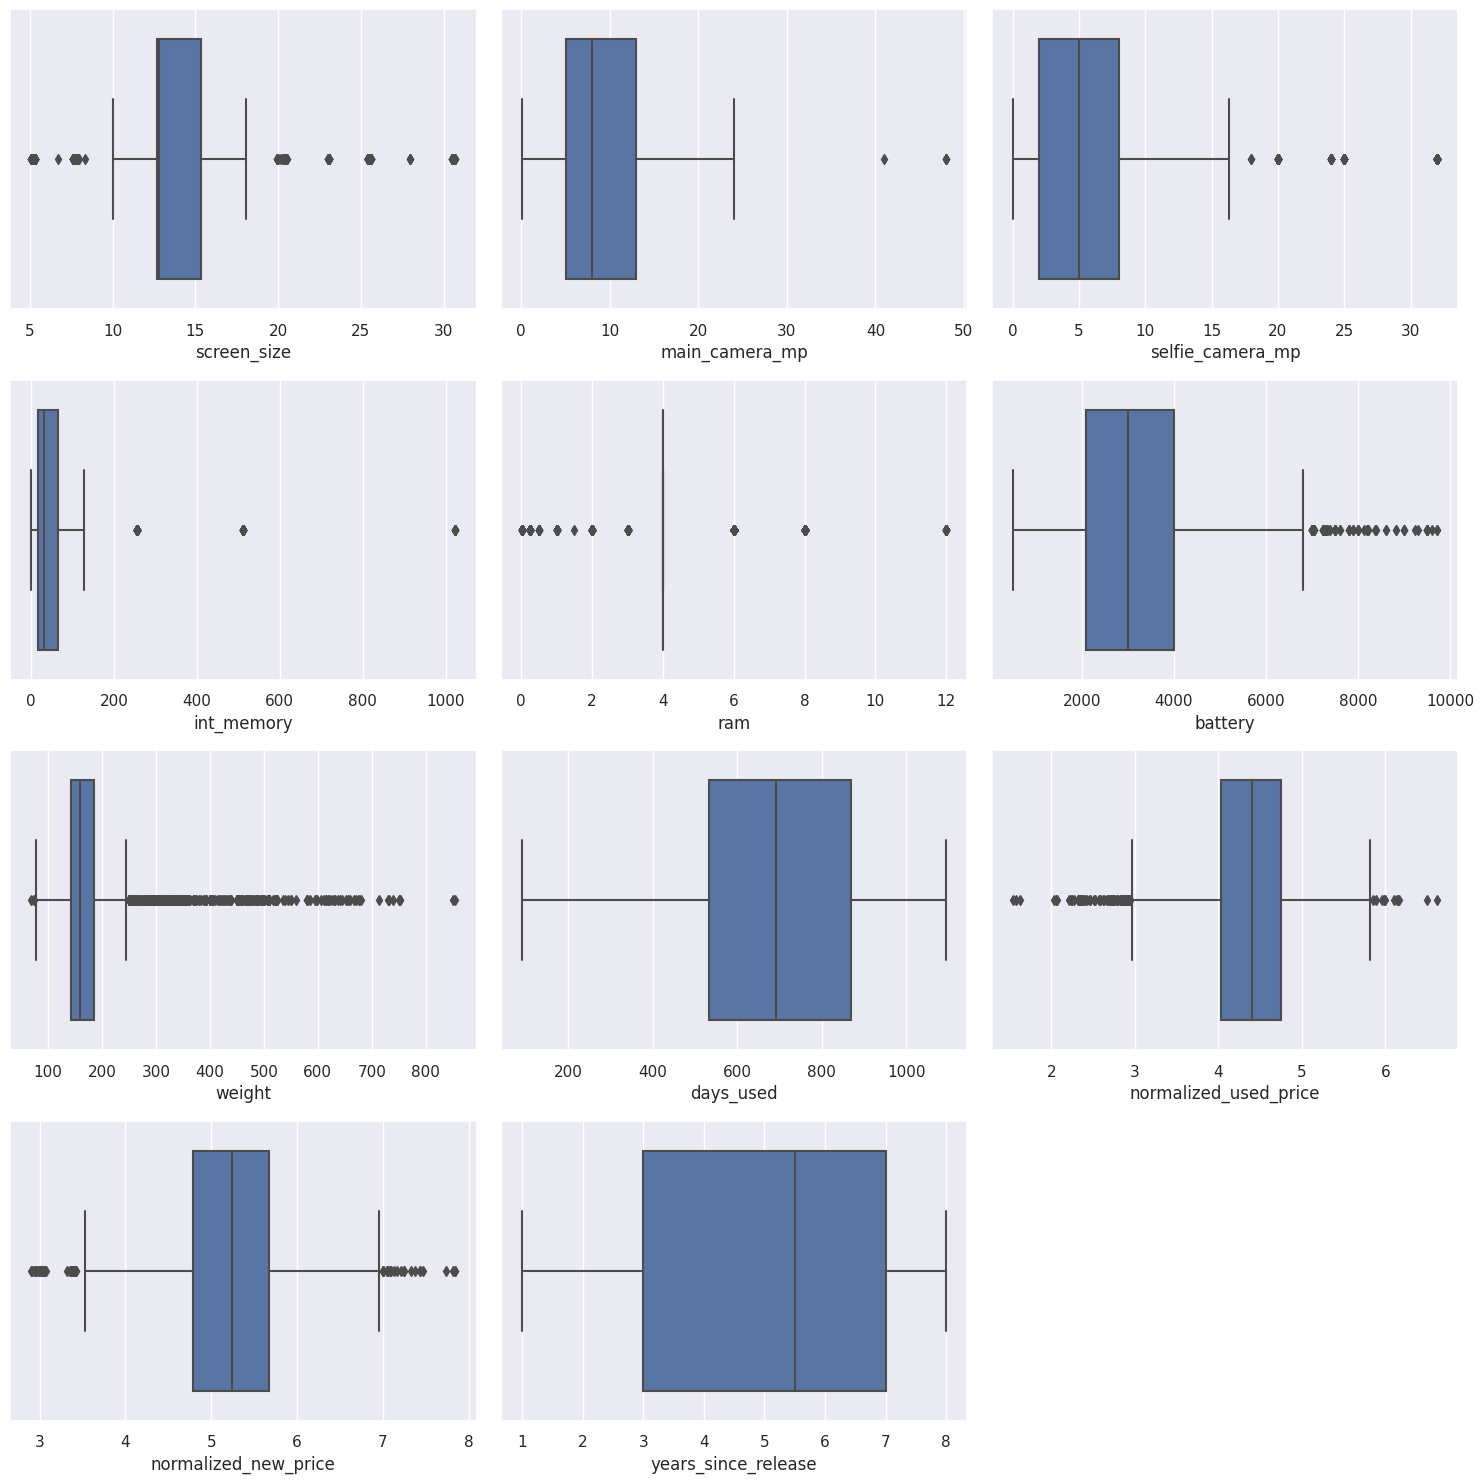

In [ ]:
col_list = df1.select_dtypes(include=np.number).columns.to_list()

plt.figure(figsize=(15,15))
for i,variable in enumerate(col_list):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df1,x=variable)
  plt.tight_layout()
plt.show()

There are outliers in the data.
We are proceeding with them.

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop('normalized_used_price',axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first =True
)  ## Complete the code to create dummies for independent features

X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...                 0   
1   4300.0   213.0        325              5.519018  ...                 0   
2   4200.0   213.0        162              5.884631  ...                 0   
3   7250.0   480.0        345              5.630961  ...                 0   
4   5000.0   185.0        293              4.947837  ...                 0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0                0                0                  0               0   
1                0                0                  0               0   
2                0                0                  0               0   
3                0                0                  0               0   
4                0                0                  0               0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0          0           0       0       1       0  
1          0           0       0       1       1  
2          0           0       0       1       1  
3          0           0       0       1       1  
4          0           0       0       1       0  

[5 rows x 49 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  3454 non-null   float64
 1   screen_size            3454 non-null   float64
 2   main_camera_mp         3454 non-null   float64
 3   selfie_camera_mp       3454 non-null   float64
 4   int_memory             3454 non-null   float64
 5   ram                    3454 non-null   float64
 6   battery                3454 non-null   float64
 7   weight                 3454 non-null   float64
 8   days_used              3454 non-null   int64  
 9   normalized_new_price   3454 non-null   float64
 10  years_since_release    3454 non-null   int64  
 11  brand_name_Alcatel     3454 non-null   uint8  
 12  brand_name_Apple       3454 non-null   uint8  
 13  brand_name_Asus        3454 non-null   uint8  
 14  brand_name_BlackBerry  3454 non-null   uint8  
 15  bran

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression


In [ ]:
olsmodel1 = sm.OLS(y,X)
olsres1 = olsmodel1.fit() ## Complete the code to fit OLS model
print(olsres1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     388.0
Date:                   Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                           01:02:08   Log-Likelihood:                 152.64
No. Observations:                   3454   AIC:                            -207.3
Df Residuals:                       3405   BIC:                             93.94
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
def ret_linear_equation(model_res):
  print('new_used_value = ',end=' ')
  for i , variable in enumerate(model_res.params):
    if i == 0:
      print(model_res.params[i],'+',end=' ')
    elif i < len(model_res.params)-1:
      print('(',model_res.params[i],')*(',model_res.params.index[i],')','+',end=' ')
    else:
      print('(',model_res.params[i],')*(',model_res.params.index[i],')')

In [ ]:
ret_linear_equation(olsres1)


new_used_value =  1.3454697399318654 + ( 0.02632243364581964 )*( screen_size ) + ( 0.021344487825032735 )*( main_camera_mp ) + ( 0.01355220151144146 )*( selfie_camera_mp ) + ( 6.858277468811302e-05 )*( int_memory ) + ( 0.02277298800107723 )*( ram ) + ( -1.737954969785669e-05 )*( battery ) + ( 0.0009125310494000762 )*( weight ) + ( 4.194060906755699e-05 )*( days_used ) + ( 0.4281338236424942 )*( normalized_new_price ) + ( -0.025336578579907836 )*( years_since_release ) + ( -0.026177714199205282 )*( brand_name_Alcatel ) + ( -0.006229438284649888 )*( brand_name_Apple ) + ( 0.03272189327320914 )*( brand_name_Asus ) + ( 0.050113750439335455 )*( brand_name_BlackBerry ) + ( -0.13469265918835008 )*( brand_name_Celkon ) + ( 0.016089966488793923 )*( brand_name_Coolpad ) + ( 0.0032379028375530442 )*( brand_name_Gionee ) + ( -0.007098418072830383 )*( brand_name_Google ) + ( -0.010270905728727115 )*( brand_name_HTC ) + ( 0.010936533063210236 )*( brand_name_Honor ) + ( -0.016952548732251136 )*( bran

In [ ]:
def ret_df_linear_equation(model_res):
  df_l = pd.DataFrame()
  df_l['Parameters'] = model_res.params.index
  df_l['Co-efficients'] = model_res.params.values
  return df_l

In [ ]:
len(olsres1.params.index)

49

In [ ]:
ret_df_linear_equation(olsres1)

parameters  co-efficients
0                   const       1.345470
1             screen_size       0.026322
2          main_camera_mp       0.021344
3        selfie_camera_mp       0.013552
4              int_memory       0.000069
5                     ram       0.022773
6                 battery      -0.000017
7                  weight       0.000913
8               days_used       0.000042
9    normalized_new_price       0.428134
10    years_since_release      -0.025337
11     brand_name_Alcatel      -0.026178
12       brand_name_Apple      -0.006229
13        brand_name_Asus       0.032722
14  brand_name_BlackBerry       0.050114
15      brand_name_Celkon      -0.134693
16     brand_name_Coolpad       0.016090
17      brand_name_Gionee       0.003238
18      brand_name_Google      -0.007098
19         brand_name_HTC      -0.010271
20       brand_name_Honor       0.010937
21      brand_name_Huawei      -0.016953
22     brand_name_Infinix       0.145448
23     brand_name_Karbonn      -0.016671
24          brand_name_LG      -0.031616
25        brand_name_Lava       0.008523
26      brand_name_Lenovo       0.015912
27       brand_name_Meizu      -0.022515
28    brand_name_Micromax      -0.030847
29   brand_name_Microsoft       0.064336
30    brand_name_Motorola      -0.041199
31       brand_name_Nokia       0.053359
32     brand_name_OnePlus       0.014095
33        brand_name_Oppo      -0.001239
34      brand_name_Others      -0.017369
35   brand_name_Panasonic      -0.000013
36      brand_name_Realme       0.025243
37     brand_name_Samsung      -0.028440
38        brand_name_Sony      -0.065210
39       brand_name_Spice      -0.022157
40        brand_name_Vivo      -0.035661
41        brand_name_XOLO      -0.014054
42      brand_name_Xiaomi       0.065322
43         brand_name_ZTE      -0.012551
44              os_Others      -0.054658
45             os_Windows      -0.017757
46                 os_iOS      -0.081615
47                 4g_yes       0.045468
48                 5g_yes      -0.063133

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsres1, x_train, y_train)
olsmodel1_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.230819  0.180296   0.843621        0.840384  4.317185

In [ ]:
# checking model performance on test set (seen 30% data)
print("Testing Performance\n")
olsmodel1_test_perf = model_performance_regression(olsres1, x_test, y_test)
olsmodel1_test_perf

Testing Performance



RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.233114  0.18103   0.849334        0.841855  4.392699

We infer that the model has 84% of variance in the dependent variable and the model is stable.


From the model we built from training data, we tested the performance on testing data.

We infer that model has R-squared value with a difference of 0.006 and
adjusted R-squared has a difference of 0.001.

The difference is miniscule and we infer that the ,model performs well on testing as well.



## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)  ## Complete the code to check VIF on train data

feature         VIF
0                   const  227.744081
1             screen_size    7.677290
2          main_camera_mp    2.285051
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081780
7                  weight    6.396749
8               days_used    2.660269
9    normalized_new_price    3.119430
10    years_since_release    4.899007
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057668
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951272
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410361
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849832
25        brand_name_Lava    1.711360
26      brand_name_Lenovo    4.558941
27       brand_name_Meizu    2.179607
28    brand_name_Micromax    3.363521
29   brand_name_Microsoft    1.869751
30    brand_name_Motorola    3.274558
31       brand_name_Nokia    3.479849
32     brand_name_OnePlus    1.437034
33        brand_name_Oppo    3.971194
34      brand_name_Others    9.711034
35   brand_name_Panasonic    2.105703
36      brand_name_Realme    1.946812
37     brand_name_Samsung    7.539866
38        brand_name_Sony    2.943161
39       brand_name_Spice    1.688863
40        brand_name_Vivo    3.651437
41        brand_name_XOLO    2.138070
42      brand_name_Xiaomi    3.719689
43         brand_name_ZTE    3.797581
44              os_Others    1.859863
45             os_Windows    1.596034
46                 os_iOS   11.784684
47                 4g_yes    2.467681
48                 5g_yes    1.813900

### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns,r2_init):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []
    diff = []
    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        r2 = olsmodel.rsquared_adj
        adj_r2.append(r2)
        rmse.append(np.sqrt(olsmodel.mse_resid))
        diff.append(r2-r2_init)

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
            'Diff between adj_r2 and init model': diff
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size','weight'] ## Complete the code to specify the columns with high VIF
r2_init = 0.840384
res = treating_multicollinearity(x_train, y_train, col_list,r2_init) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

col  Adj. R-squared after_dropping col  RMSE after dropping col  \
0  screen_size                           0.838381                 0.234703   
1       weight                           0.838071                 0.234928   

   Diff between adj_r2 and init model  
0                           -0.002003  
1                           -0.002313

In [ ]:
#Now lets remove weight variable from the training and testing data set and let us test the vif score again

col_to_drop = 'weight'
x_train_d = x_train.loc[:,~x_train.columns.str.startswith(col_to_drop)]
x_test_d = x_test.loc[:,~x_test.columns.str.startswith(col_to_drop)]

#Once after dropping the column lets check the vif score

vif = checking_vif(x_train_d)
print('Vif score after dropping ',col_to_drop)
print(vif)

olmodel4 = sm.OLS(y_train,x_train_d)
olsres4 = olmodel4.fit()

print(olsres4.summary())

Vif score after dropping  weight
                  feature         VIF
0                   const  208.983030
1             screen_size    3.593184
2          main_camera_mp    2.188817
3        selfie_camera_mp    2.787946
4              int_memory    1.364018
5                     ram    2.280390
6                 battery    3.681135
7               days_used    2.648280
8    normalized_new_price    3.116297
9     years_since_release    4.726722
10     brand_name_Alcatel    3.405634
11       brand_name_Apple   13.052085
12        brand_name_Asus    3.329527
13  brand_name_BlackBerry    1.632331
14      brand_name_Celkon    1.774249
15     brand_name_Coolpad    1.467932
16      brand_name_Gionee    1.951224
17      brand_name_Google    1.321656
18         brand_name_HTC    3.408430
19       brand_name_Honor    3.339066
20      brand_name_Huawei    5.983684
21     brand_name_Infinix    1.282407
22     brand_name_Karbonn    1.573621
23          brand_name_LG    4.849000
24        brand_n

We infer that after dropping 'weight' , the adj r2 score is 0.838.(r2 score from init model is - 0.840384

This 0.0023 decrease

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train_d.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()


# setting an initial max p-value
max_p_value = 1
while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    max_p_value = model.pvalues.max()

     # name of the variable with maximum p-value
    feature_with_p_max = model.pvalues.idxmax()

    if max_p_value > 0.05:
      cols.remove(feature_with_p_max)
    else:
      break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
x_train5 = x_train_d[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test5 = x_test_d[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel5 = sm.OLS(y_train,x_train5)
olsres5 = olsmodel5.fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsres5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                           02:48:07   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We infer that after dropping all p values greater than 0.05 , the adj r2 score is 0.839 and r2 score is 0.839.(adj r2 score from init model is - 0.840384,  r2 score - 0.843)
This is  0.001 decrease in adj r2 score.

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel6_train_perf = model_performance_regression(olsres5,x_train5,y_train) ## Complete the code to check performance on train data
olsmodel6_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233989  0.183177   0.839296        0.838494  4.392265

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel6_test_perf = model_performance_regression(olsres5,x_test5,y_test) ## Complete the code to check performance on test data
olsmodel6_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared      MAPE
0  0.238554  0.185    0.84222        0.840371  4.500963

 They perform well on testing than training.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsres5.fittedvalues  # predicted values
df_pred["Residuals"] = olsres5.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.858599   0.228888
1525       4.448399       4.613833  -0.165434
1128       4.315353       4.277568   0.037785
3003       4.282068       4.252225   0.029844
2907       4.456438       4.440283   0.016156

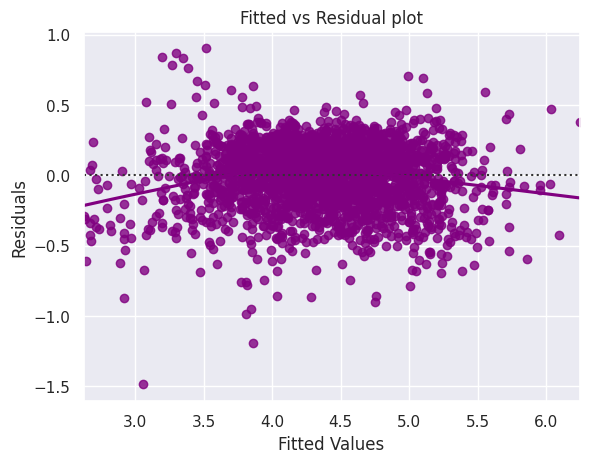

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

From the residual plot of fitted values and residuals we infer that the graph does not show any pattern.

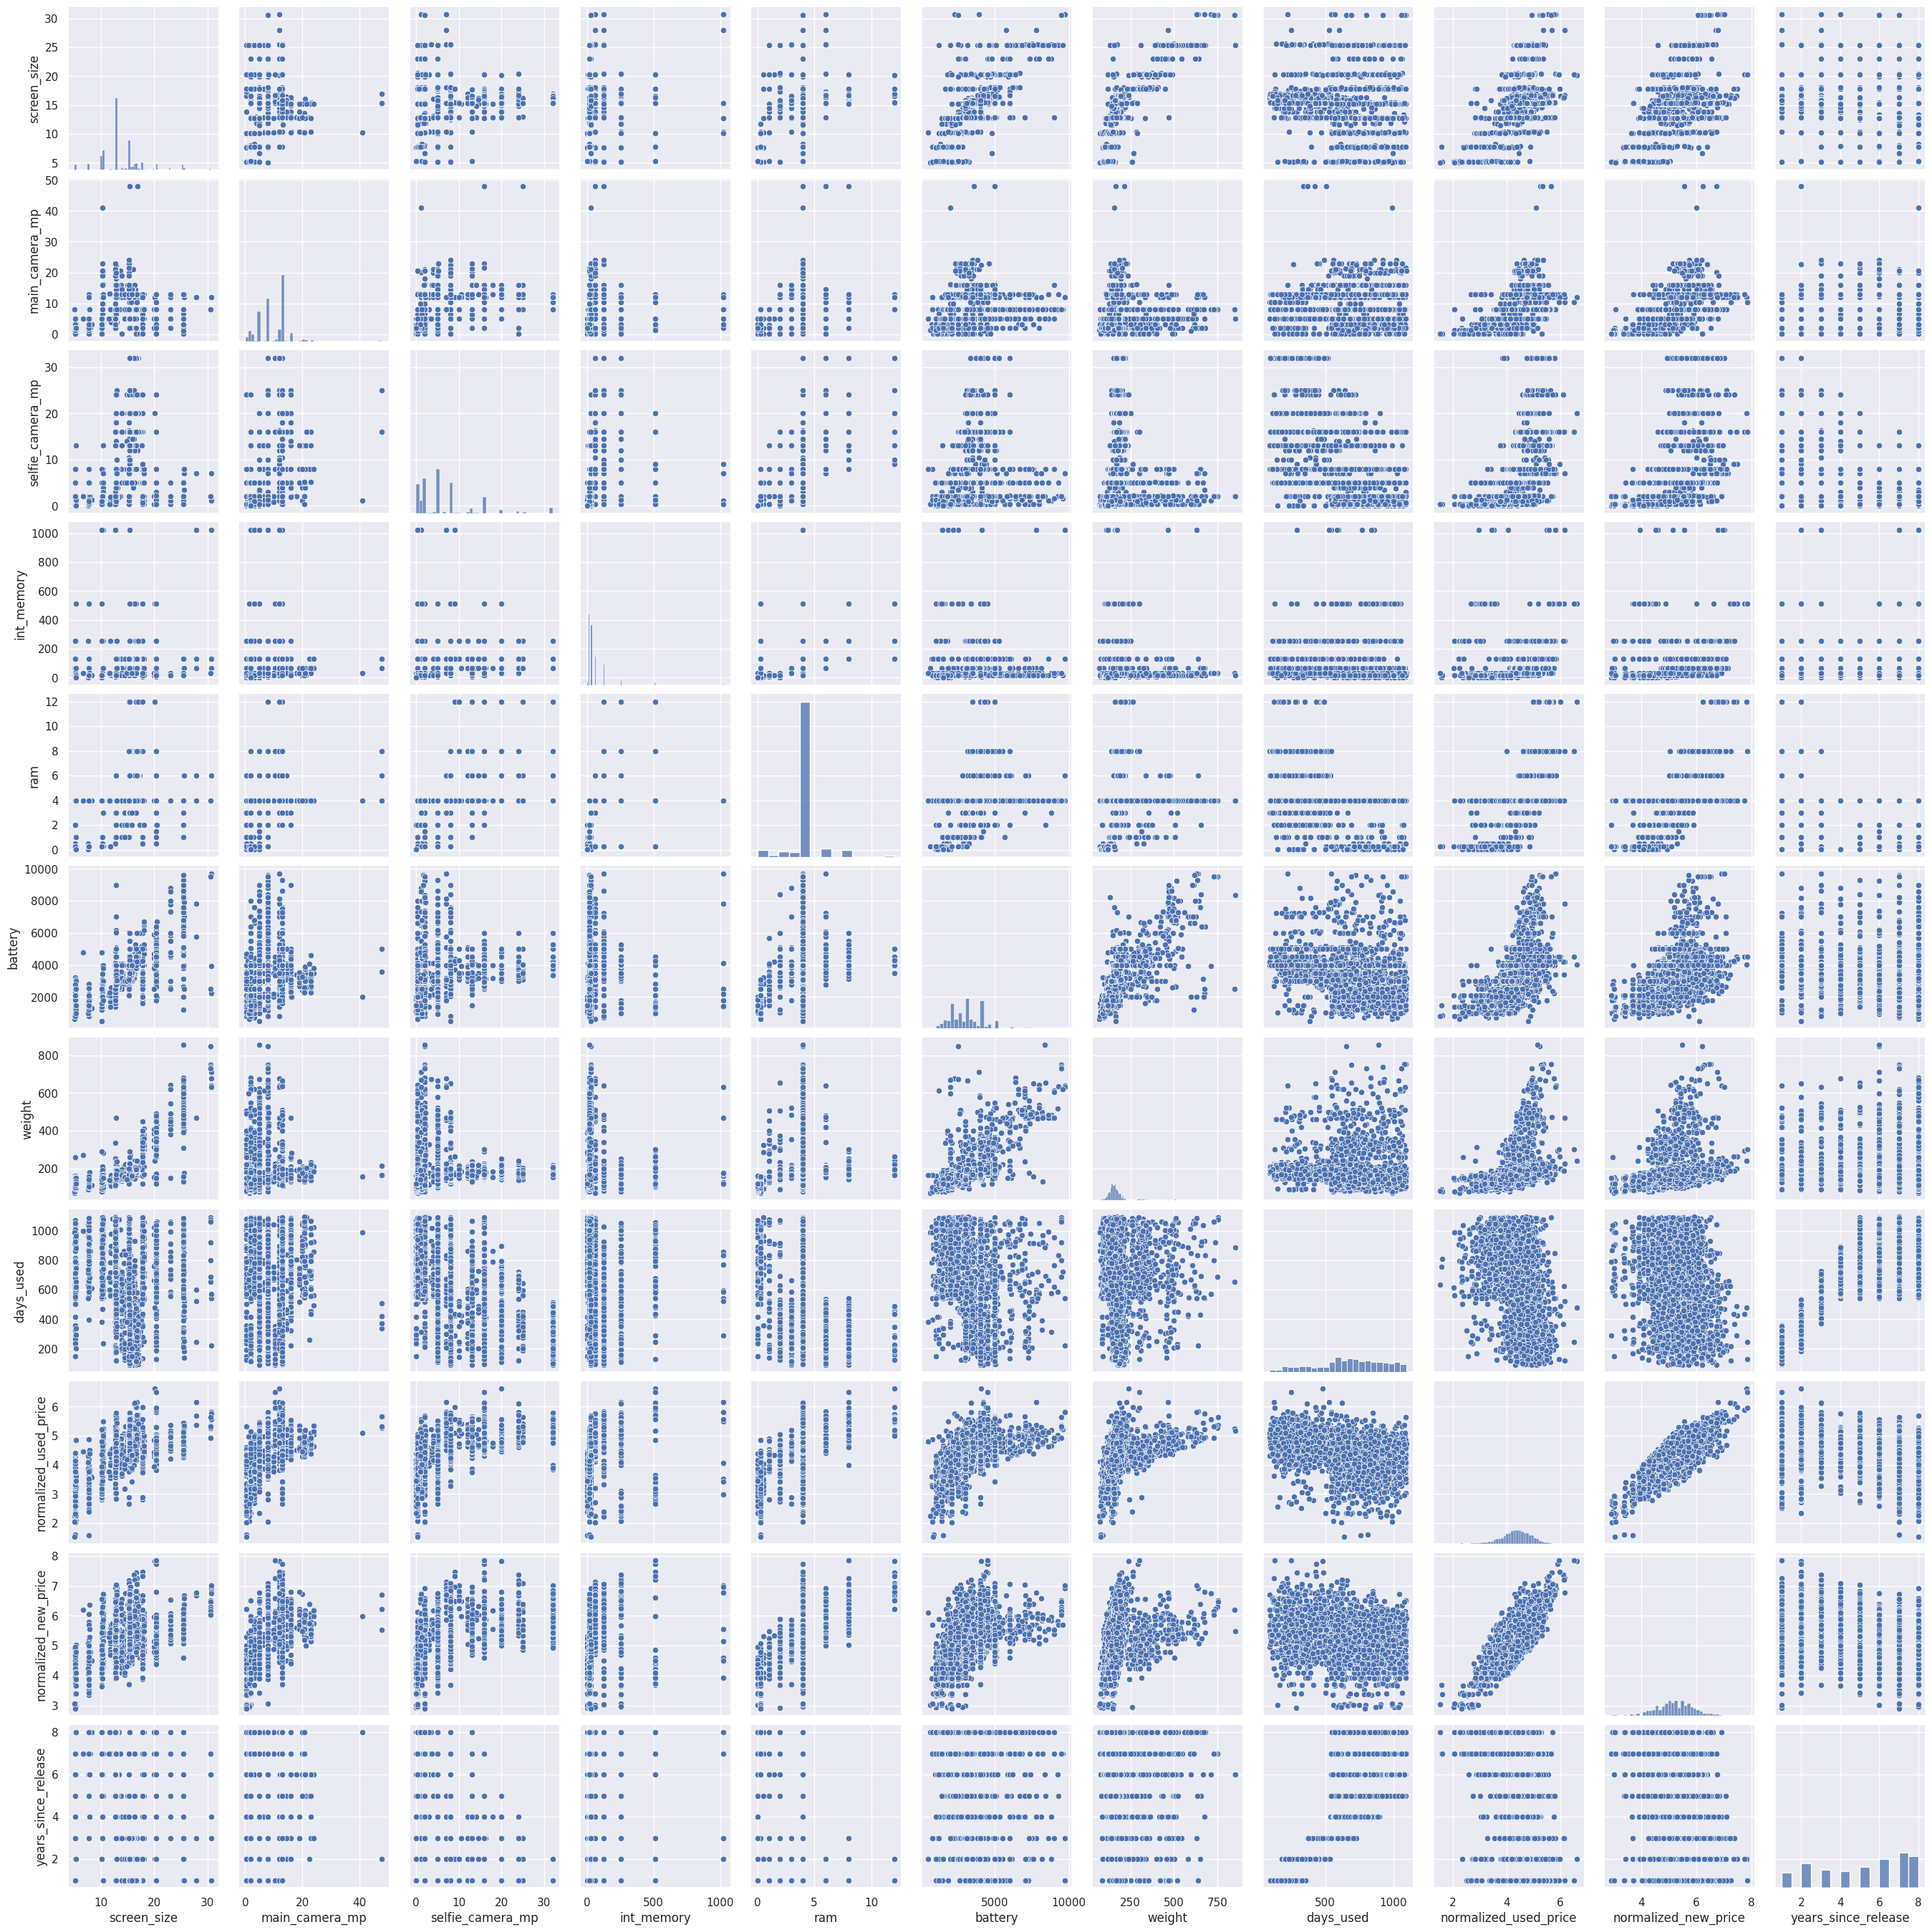

In [ ]:
sns.pairplot(df1[df1.select_dtypes(include=np.number).columns.to_list()])

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

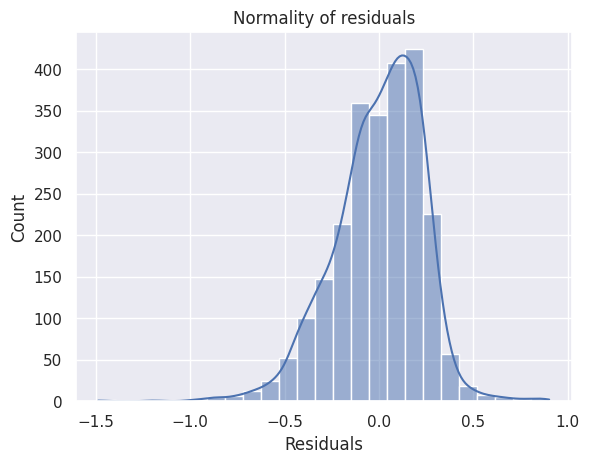

In [ ]:
sns.histplot(data=df_pred,x='Residuals',kde=True,bins=25) ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

 From  histogram plot of residuals we infer that , residuals are approximately following normal distribution.

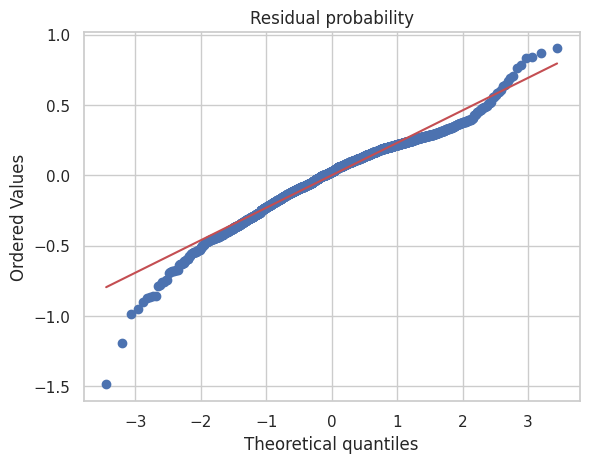

In [ ]:
import pylab
import scipy.stats as stats

sns.set_style('whitegrid')
stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.title('Residual probability')
plt.show()

fROM Q-Q plot we infer that data is close to normal.


Test: shapiro wilks test
null hypotheis: residual data follows normal dsbn
alternate: residual data does not follow normal dsbn
alpha value : 0.05

In [ ]:
stats.shapiro(df_pred['Residuals']) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9724023342132568, pvalue=3.463951697107566e-21)

In [ ]:
#if p value < 0.05 null is rejected

#Strictly speaking Residuals doesnt follow normal distribution.
#But from histogram and Q-Q plot we infer that residuals follow normal ditribution



### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"],x_train5) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0554902509992028), ('p-value', 0.17520491832996798)]

In [ ]:
#P-value greater than 0.05, we can say that the residuals are homoscedastic.

## Final Model Summary

In [ ]:
olsmodel_final = sm.OLS(y_train,x_train5)
olsres_final = olsmodel_final.fit() ## Complete the code to fit the final model
print(olsres_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                           02:51:43   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsres_final,x_train5,y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233989  0.183177   0.839296        0.838494  4.392265

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsres1_final,x_test5,y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared      MAPE
0  0.238554  0.185    0.84222        0.840371  4.500963

The model is able to explain ~84% of the variation in the data

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

The MAPE on the test set suggests we can predict within 4% of the used price.

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

In [ ]:
print('new_used_value = ',end=' ')
for i , variable in enumerate(olsres_final.params):
  if i == 0:
    print(olsres_final.params[i],'+',end=' ')
  elif i < len(olsres_final.params)-1:
    print('(',olsres_final.params[i],')*(',olsres_final.params.index[i],')','+',end=' ')
  else:
    print('(',olsres_final.params[i],')*(',olsres_final.params.index[i],')')


new_used_value =  1.211877182446589 + ( 0.04325227839850706 )*( screen_size ) + ( 0.01887270126675185 )*( main_camera_mp ) + ( 0.01312145306668679 )*( selfie_camera_mp ) + ( 0.01721186574247073 )*( ram ) + ( 6.226184812230229e-05 )*( days_used ) + ( 0.4281848961888841 )*( normalized_new_price ) + ( -0.01810909590309117 )*( years_since_release ) + ( 0.048896542698008555 )*( brand_name_Lenovo ) + ( 0.0733422976162527 )*( brand_name_Nokia ) + ( 0.08517107570968024 )*( brand_name_Xiaomi ) + ( 0.03688051823569805 )*( 4g_yes )


In [ ]:
olsres_final.params

const                   1.211877
screen_size             0.043252
main_camera_mp          0.018873
selfie_camera_mp        0.013121
ram                     0.017212
days_used               0.000062
normalized_new_price    0.428185
years_since_release    -0.018109
brand_name_Lenovo       0.048897
brand_name_Nokia        0.073342
brand_name_Xiaomi       0.085171
4g_yes                  0.036881
dtype: float64

##  Actionable Insights and Recommendations

Insights:
----------

* A unit increase in normalized_new_price increases the normalized_used_price  
  by 0.428 units.
* A unit increase in screen_size increases the normalized_used_price  
  by 0.0432 units.
* If the phone is 4g_yes, it  increases the normalized_used_price  
  by 0.037 units.
* A unit increase in Years_since_release  decreases the normalized_used_price  
  by 0.018 units.





Recommendations:
----------------

* The model is able to explain ~84% of the variation in the data and within  
  4% of the used normalized price on the test data, which is good
  This indicates that the model is good for prediction as well as inference purposes.

* Price of a used phone highly tend to depend upon the market value of the new
  phone, which is obvious. Higher end phones will have high resalable value and vice versa.

* People tend to buy used phones from recently released years.
  It is recommended to give more promotions for latest year model phones to be turned in to increase revenue.

* With the increase in the number of years since release, the used price value
  decrease.Its recommended that ReCell purchases new products in comparison with previous year products.

* Users tend to prefer phones that support 4g.
  Newer models that has 4g tends to boost the used market revenue.

* Users prefers larger screen size.
  It is recommended for ReCell to give more promotions for phones to be turned in with bigger screens to boost revenue.

* User details like age of customer, salary,etc can be collected to make further predictions.   
